# Finansų ekonometrijos modeliai:  Namų darbų užduotys

In [36]:
# Plot options
options(repr.plot.width = 25)
options(repr.plot.height = 8)
options(scipen = 999)

In [37]:
set.seed(1711447)
# Pakeisti savo studento kodu
symbols_stocks <-c("NVDA", "INTC", "AMD", "FB", "AAPL", "MSFT","IBM", "TWTR", "NFLX", "GOOGL", "AMZN", "EBAY", "BABA","DIS", "TSLA", "KO", "PEP", "ADBE","AAL", "HPQ", "MCD", "NDAQ")
symbols_indexes <-c("^GSPC", "^DJI", "^FTSE", "^GDAXI", "^IXIC")
my_symbols <-c(sample(symbols_stocks, 1),sample(symbols_indexes, 1))
#
library(quantmod)
for(var_names in my_symbols){
    # Get the symbol:
    getSymbols(var_names,  auto.assign = TRUE,src  = "yahoo",from = "2018-01-01",to   = "2020-06-25")
    # Automatically remove missing data from the variable:
    assign(gsub("\\^", "", var_names),na.omit(get(gsub("\\^", "", var_names))))
}
print(paste0("Simboliai: ",sub("\\^", "", my_symbols)))

[1] "Simboliai: ADBE" "Simboliai: FTSE"


In [38]:
# Bibliotekos
library("ggplot2")
library("qrmtools")
library("e1071")
library("forecast")
library("rugarch")
library("tseries")
library("aTSA")
library("dynlm")
library("sandwich")
library("lmtest")
library("fGarch")
library("broom")

# I dalis

## 1.
Pasinaudoję įmonės akcijų ir akcijų indekso simbolių uždarymo kainomis apskaičiuokite paprastąsias grąžas ir išbrėžkite jų laiko eilučių grafikus.

## ADBE

In [39]:
head(ADBE[, 'ADBE.Close'])

           ADBE.Close
2018-01-02     177.70
2018-01-03     181.04
2018-01-04     183.22
2018-01-05     185.34
2018-01-08     185.04
2018-01-09     186.70

In [40]:
closing_price_adbe  <- ADBE[, 'ADBE.Close']

In [41]:
adbe_returns <- returns(closing_price_adbe, method = "simple")

In [42]:
head(adbe_returns)

ADBE.Close  
2018-01-03           NA
2018-01-03  0.018795701
2018-01-04  0.012041582
2018-01-05  0.011570762
2018-01-08 -0.001618663
2018-01-09  0.008971055

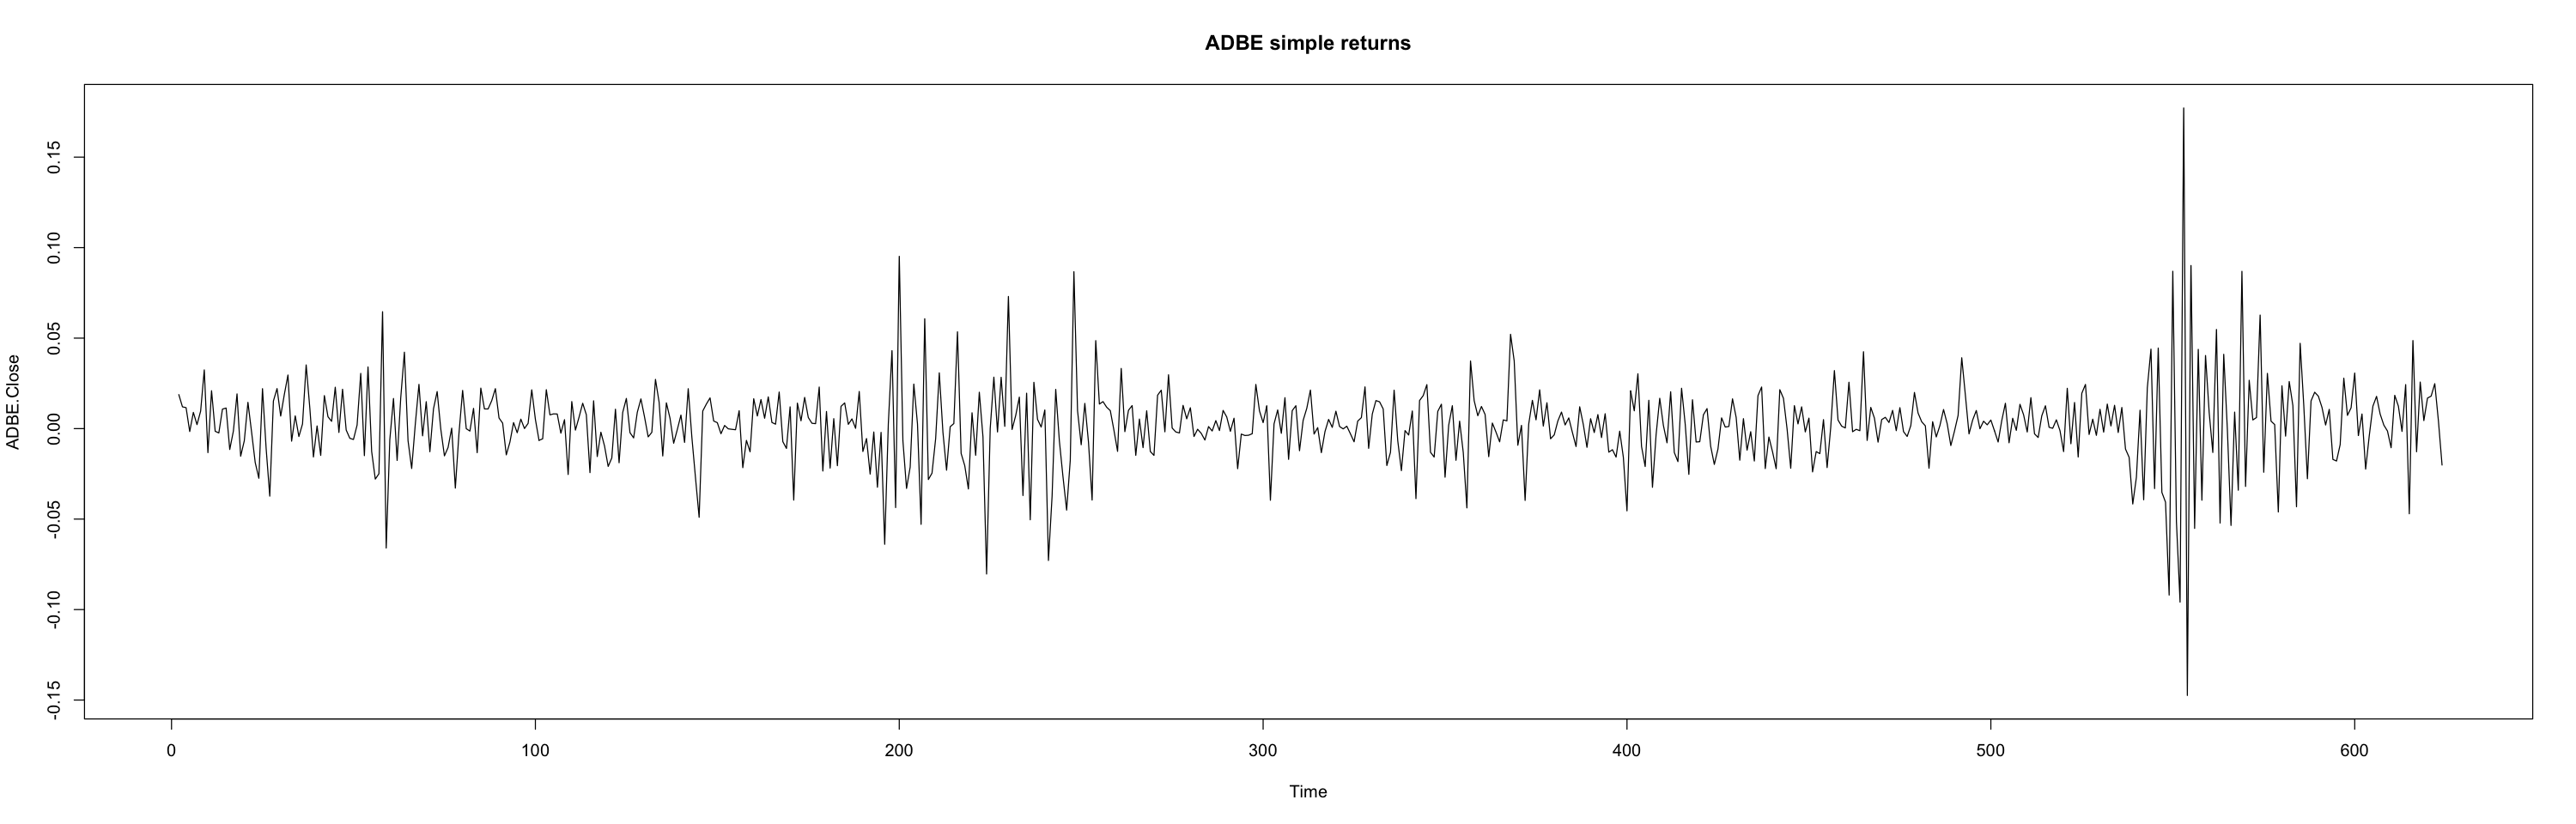

In [43]:
plot.ts(adbe_returns, main = "ADBE simple returns")

## FTSE

In [44]:
closing_price_ftse  <- FTSE[, 'FTSE.Close']

In [45]:
ftse_returns <- returns(closing_price_ftse, method = "simple")

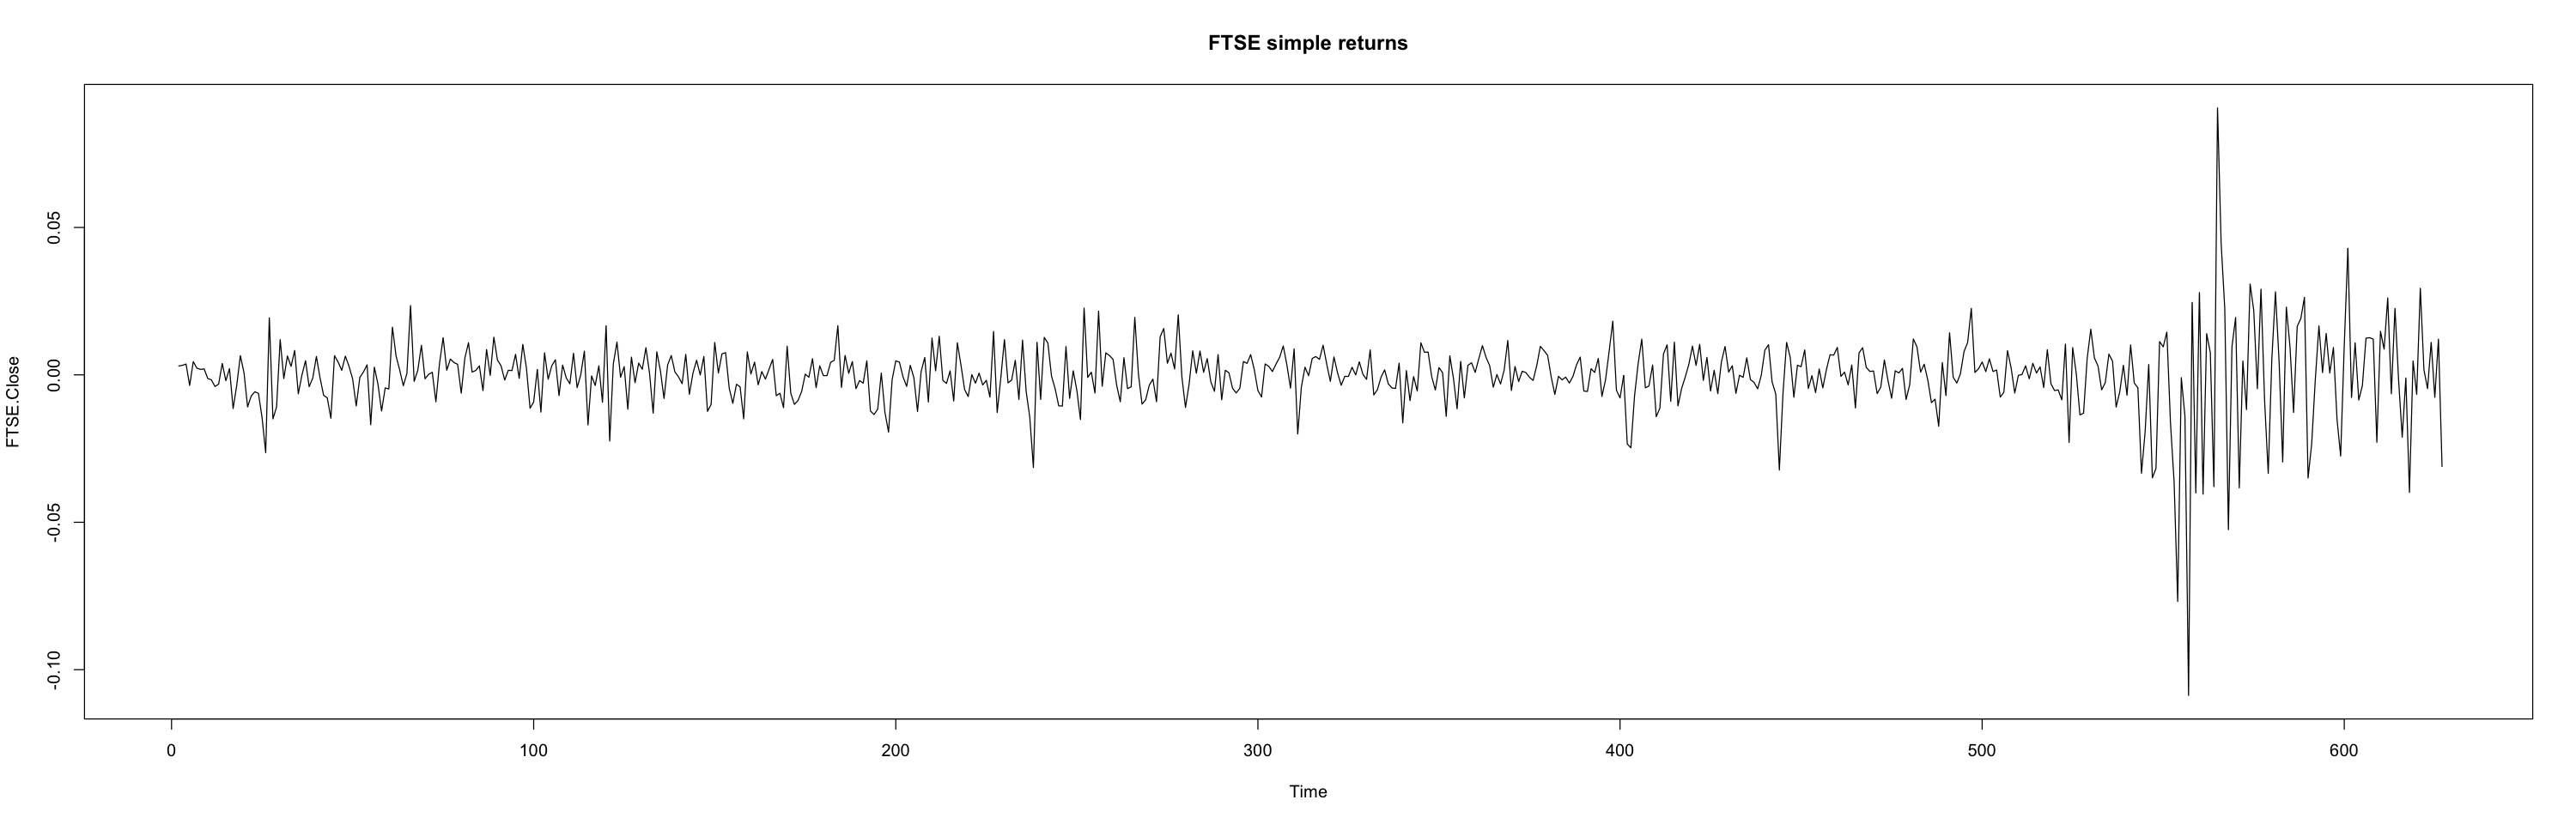

In [46]:
plot.ts(ftse_returns, main = "FTSE simple returns")

## 2.

Išreikškite paprastąsias grąžas logaritmuota ir log-procentine išraiška. Šioms išraiškoms apskaičiuokite: 
* paprastąjį vidurkį,
* standartinį nuokrypį,
* asimetrijos koeficientą (angl.skewness),
* ekscesą (angl.excess kurtosis

## ADBE

In [47]:
adbe_log_returns <- returns(closing_price_adbe) #log returns

In [48]:
head(adbe_log_returns)

ADBE.Close  
2018-01-02           NA
2018-01-03  0.018621244
2018-01-04  0.011969659
2018-01-05  0.011504333
2018-01-08 -0.001619974
2018-01-09  0.008931054

In [49]:
adbe_log_precent_returns <- adbe_log_returns *100  #log percent 

In [50]:
head(adbe_log_precent_returns)

ADBE.Close
2018-01-02         NA
2018-01-03  1.8621244
2018-01-04  1.1969659
2018-01-05  1.1504333
2018-01-08 -0.1619974
2018-01-09  0.8931054

Vidurkis

In [51]:
# log returns
mean(adbe_log_returns, na.rm = T)

[1] 0.0014247

In [52]:
# log percent
mean(adbe_log_precent_returns, na.rm = T)

[1] 0.14247

Standartinis nuokrypis

In [53]:
#log returns
sd(adbe_log_returns, na.rm = T)

[1] 0.02345135

In [54]:
#log percent
sd(adbe_log_precent_returns, na.rm=T)

[1] 2.345135

Asimetrijos koeficientas

In [55]:
#log returns
skewness(adbe_log_returns, na.rm=T)

[1] -0.174281
attr(,"method")
[1] "moment"

In [56]:
#log percent
skewness(adbe_log_precent_returns, na.rm=T)

[1] -0.174281
attr(,"method")
[1] "moment"

Ekscesas: $\frac{\mu_4}{\sigma^4}- 3$

In [57]:
#log returns
e1071::kurtosis(adbe_log_returns, na.rm=T)

[1] 8.950461

In [58]:
#log percent
e1071::kurtosis(adbe_log_precent_returns, na.rm = T)

[1] 8.950461

## FTSE

In [59]:
ftse_log_returns <- returns(closing_price_ftse) #log returns

In [60]:
ftse_log_precent_returns <- ftse_log_returns*100 #log percent 

Vidurkis

In [61]:
mean(ftse_log_returns, na.rm = T) #log returns

[1] -0.000355097

In [62]:
mean(ftse_log_precent_returns, na.rm = T) #log percent 

[1] -0.0355097

Standartinis nuokrypis

In [63]:
sd(ftse_log_returns, na.rm=T) #log return
sd(ftse_log_precent_returns, na.rm = T) #log percent

[1] 0.0125863

[1] 1.25863

Asimetrijos koeficientas

In [64]:
skewness(ftse_log_returns, na.rm = T) #log return
skewness(ftse_log_precent_returns, na.rm = T) #log percent

[1] -1.473001
attr(,"method")
[1] "moment"

[1] -1.473001
attr(,"method")
[1] "moment"

Ekscesas

In [65]:
kurtosis(ftse_log_returns, na.rm = T) #log return
kurtosis(ftse_log_precent_returns, na.rm = T) #log percent

[1] 17.74116
attr(,"method")
[1] "excess"

[1] 17.74116
attr(,"method")
[1] "excess"

## 3.

Ar logaritmuotų grąžų vidurkis statistiškai reikšmingai nesiskiria nuo nulio? Užrašykite ir patiktinkite šią nulinę hipotezę. Ką gauti testo rezultatai pasako apie tiriamas grąžas?

\begin{aligned}
H_0 &: \mu  = 0\\
H_1 &: \mu\neq 0
\end{aligned}

### ADBE

In [66]:
t.test(as.vector(adbe_log_returns), mu=0)


	One Sample t-test

data:  as.vector(adbe_log_returns)
t = 1.5163, df = 622, p-value = 0.1299
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.0004203917  0.0032697909
sample estimates:
mean of x 
0.0014247 


Tarę, kad $\alpha$ reikšmė yra 0.05, o $p-reikšmė$ yra 0.1299, nulinės hipotezės atmesti negalime,  nes $p-reikšmė$ = 0.1299 > 0.05 = $\alpha$. Todėl logaritmuotų grąžų vidurkis reikšmingai nesiskiria nuo nulio. Tai reiškia, kad vidutiniškai akcija generuoja nulinę grąža.

### FTSE

In [67]:
t.test(as.vector(ftse_log_returns), mu=0)


	One Sample t-test

data:  as.vector(ftse_log_returns)
t = -0.70589, df = 625, p-value = 0.4805
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.0013429694  0.0006327753
sample estimates:
   mean of x 
-0.000355097 


Rezultatai panašūs. Tarę, kad $\alpha$ reikšmė yra 0.05, o $p-reikšmė$ yra 0.4805, nulinės hipotezės atmesti negalime,  nes $p-reikšmė$ = 0.4805 > 0.05 = $\alpha$. Todėl logaritmuotų grąžų vidurkis reikšmingai nesiskiria nuo nulio. Tai reiškia, kad vidutiniškai akcija generuoja nulinę grąža.

## 4.

Ar logaritmuotų grąžų asimetrijos koeficientas statistiškai reikšmingai nesiskiria nuo nulio? Užrašykite ir patiktinkite šią nulinę hipotezę. Ką gauti testo rezultatai pasako apie tiriamas grąžas?

\begin{aligned}
H_0 &: S  = 0\\
H_1 &: S\neq 0
\end{aligned}

### ADBE

In [68]:
T_adbe = nrow(adbe_log_returns)
t_adbe_sk = skewness(adbe_log_returns, na.rm = T)/(sqrt(6/T_adbe))
t_adbe_sk

[1] -1.777324
attr(,"method")
[1] "moment"

In [69]:
qnorm(1 -0.05/2)

[1] 1.959964

Šiuo atveju gavome, kad $|t| \approx $ 1.78 < 1.96, todėl $H_0$ neatmetame. Galime teigti, jog grąžos yra gana simterinės. Grąžų pasiskirtsymas yra panašus į normaliojo skirstinio.

### FTSE

In [70]:
T_ftse = nrow(ftse_log_returns)
t_ftse_sk = skewness(ftse_log_returns, na.rm = T)/(sqrt(6/T_ftse))
t_ftse_sk

[1] -15.05779
attr(,"method")
[1] "moment"

Gavome, kad $|t| \approx $  15 > 1.96, todėl $H_0$ atmetame. Grąžų pasiskirtymas nėra panašus į normaliojo skirstinio, todėl jos nėra simetrinės.

## 5. 

Ar logaritmuotų grąžų eksceso koeficientas statistiškai reikšmingai nesiskiria nuo nulio? Užrašykite ir patiktinkite šią nulinę hipotezę. Ką gauti testo rezultatai pasako apie tiriamas grąžas?


\begin{aligned}
H_0 &: \kappa - 3   = 0\\
H_1 &: \kappa - 3 \neq 0
\end{aligned}

### ADBE

Pastaba: kadangi `kurtosis()` skaičiuoja formule $\frac{\mu_4}{\sigma^4}- 3$, tai atimti trijų skaičiuojant t statistiką mano atveju nereikia.

In [71]:
t_adbe_k = kurtosis(adbe_log_returns, na.rm = T)/(sqrt(24/T_adbe))
t_adbe_k

[1] 45.63858
attr(,"method")
[1] "excess"

Gavome, kad $|t| \approx $ 45.6 > 1.96, todėl $H_0$ atmetame. Tai reiškia, kad grąžų uodegos yra sunkios, todėl yra tikimybė, grąžų pokyčiai yra dažnesni nei normaliojo skirtsinio atveju. Grąžos dažniau pakliūna virš trijų standartinių nuokrypių ($3\sigma$). 

### FTSE

In [72]:
t_ftse_k = kurtosis(ftse_log_returns, na.rm = T) /(sqrt(24/T_ftse))
t_ftse_k

[1] 90.67974
attr(,"method")
[1] "excess"

Gavome, kad $|t| \approx $ 90.6 > 1.96, todėl $H_0$ atmetame. Ta pat intepretacija kaip ir ADBE grąžų atveju.

# II dalis

## 0

Atskirai susikurkite kintamjąjį, kuriame būtų duomenų imtis iki 2020-02-20.  Toliau naudokite šią imtį.

In [73]:
adbe_log_returns_xts <- xts(adbe_log_returns,order.by = as.Date(rownames(adbe_log_returns)))

In [74]:
adbe_log_returns_subset <- window(x = adbe_log_returns_xts, start = "2018-01-03", end = "2020-02-20")

In [75]:
head(adbe_log_returns_subset)

             ADBE.Close
2018-01-03  0.018621244
2018-01-04  0.011969659
2018-01-05  0.011504333
2018-01-08 -0.001619974
2018-01-09  0.008931054
2018-01-10  0.002193650

In [76]:
ftse_log_returns_xts <- xts(ftse_log_returns,order.by = as.Date(rownames(ftse_log_returns)))

In [77]:
ftse_log_returns_subset <- window(x = ftse_log_returns_xts, start = "2018-01-03", end = "2020-02-20")

In [78]:
head(ftse_log_returns_subset)
tail(ftse_log_returns_subset)

             FTSE.Close
2018-01-03  0.003002770
2018-01-04  0.003227673
2018-01-05  0.003670576
2018-01-08 -0.003592603
2018-01-09  0.004472540
2018-01-10  0.002261056

             FTSE.Close
2020-02-13 -0.010996735
2020-02-14 -0.005773465
2020-02-17  0.003260892
2020-02-18 -0.006925275
2020-02-19  0.010108584
2020-02-20 -0.002739420

## 1. 

ACF $r_t$

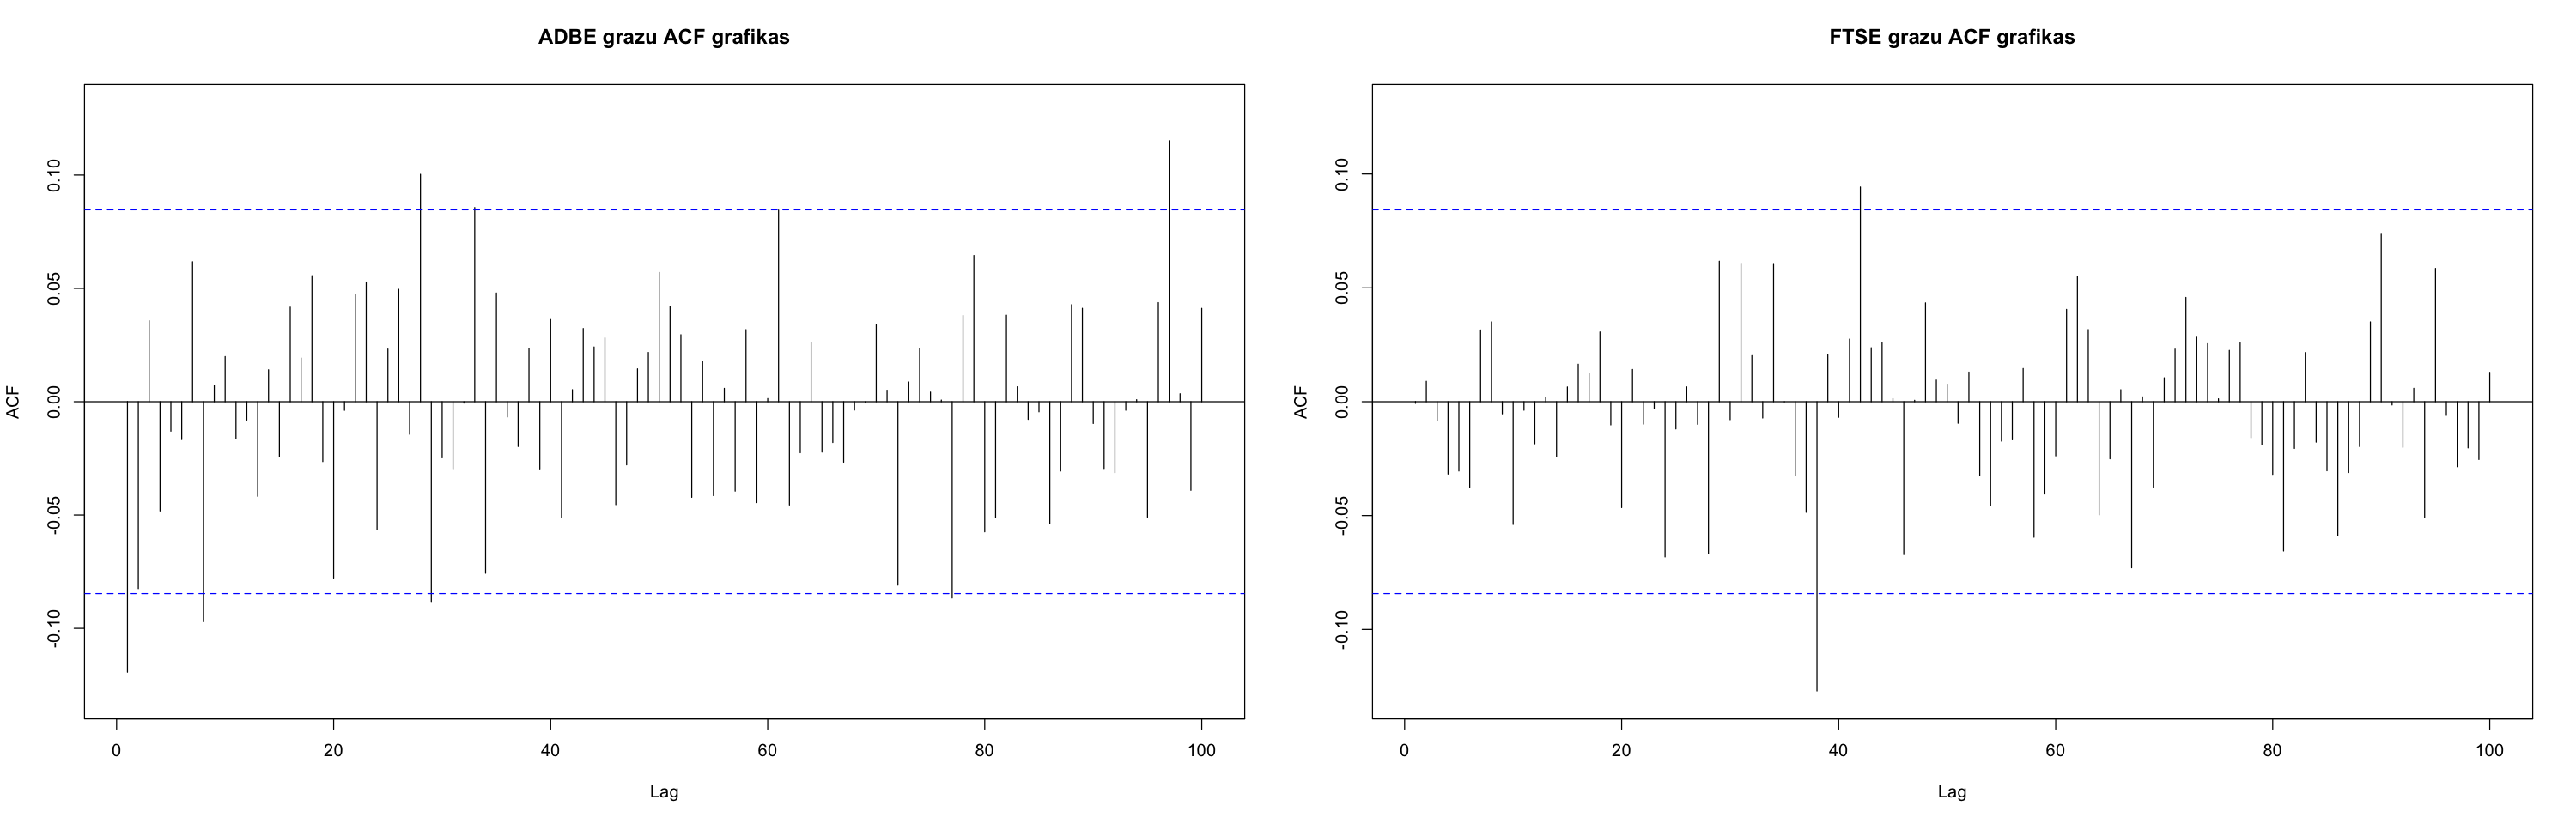

In [79]:
par(mfrow=c(1,2))
Acf(adbe_log_returns_subset, lag.max = 100, main = "ADBE grazu ACF grafikas")
Acf(ftse_log_returns_subset, lag.max = 100, main = "FTSE grazu ACF grafikas")

$|r_t| ^{\delta}, \delta = 1$

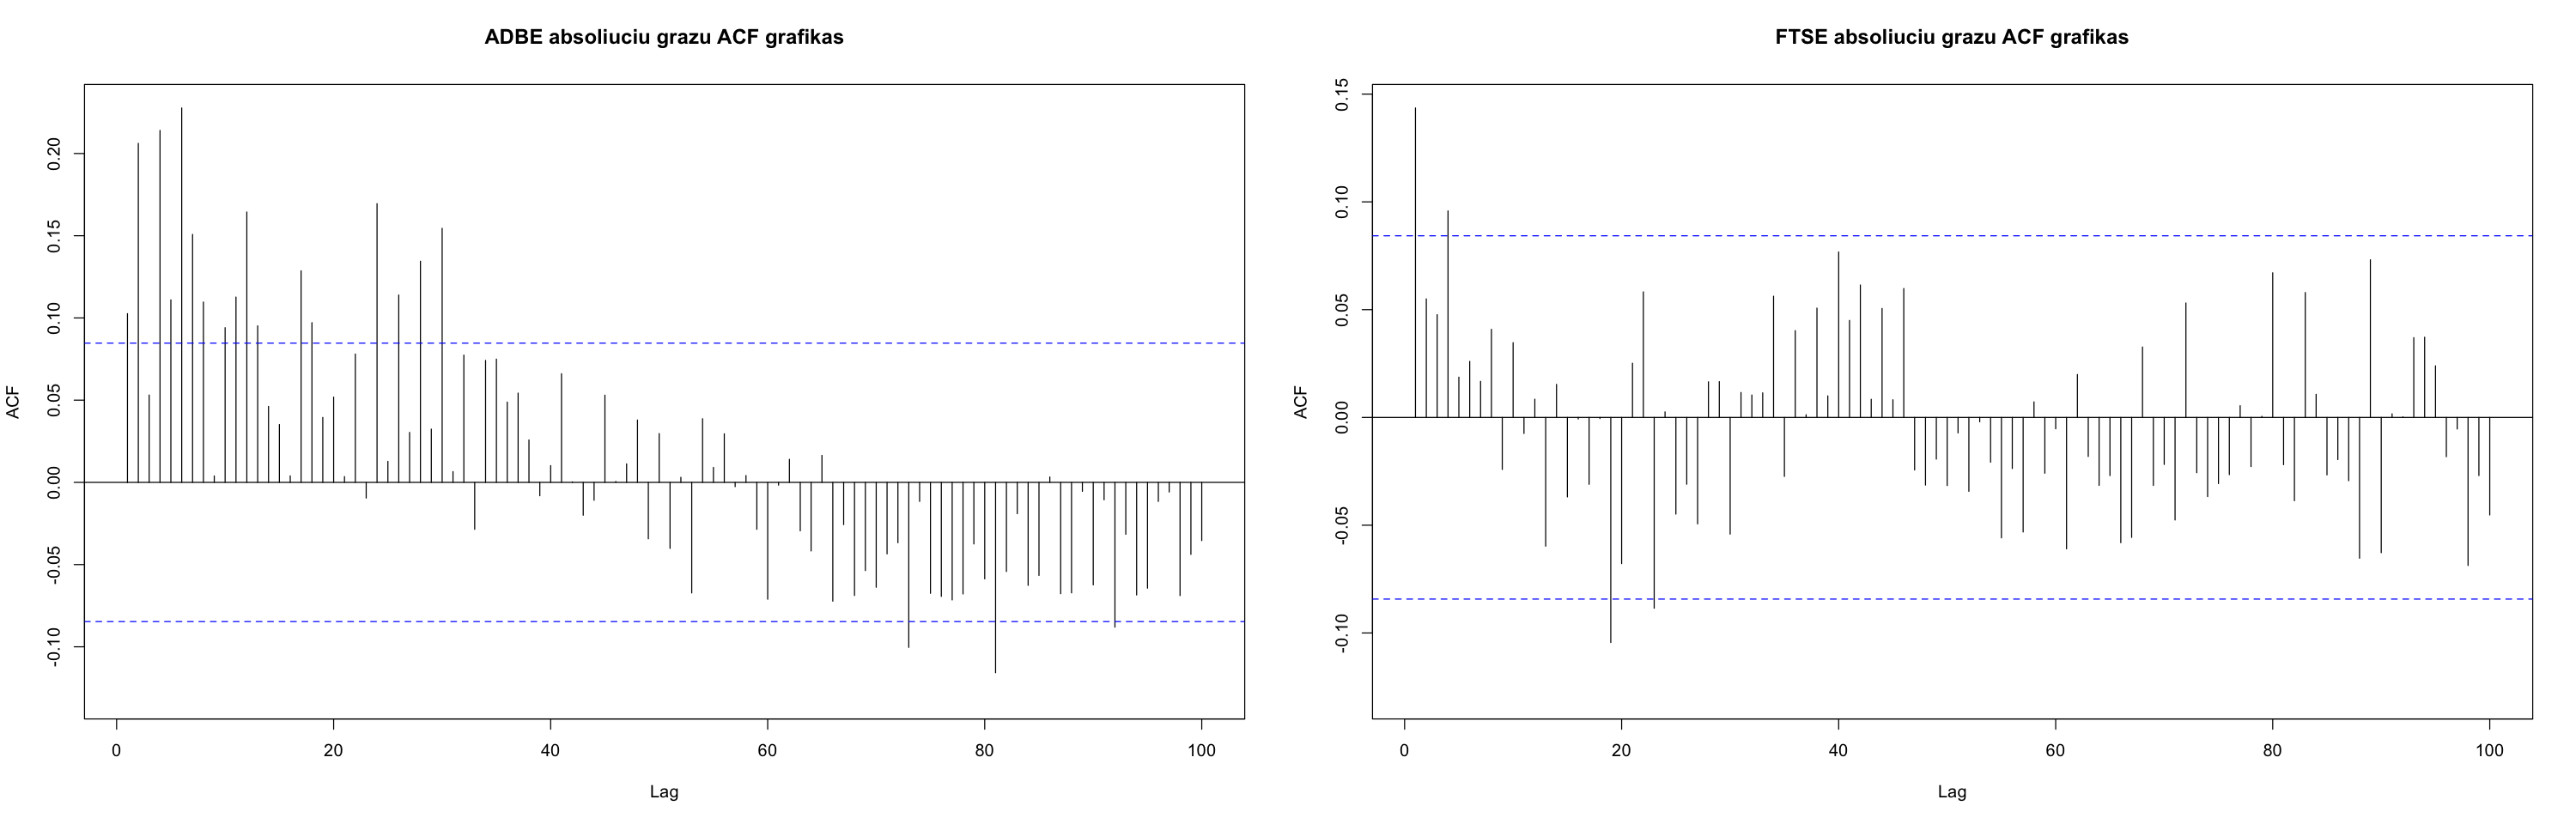

In [80]:
par(mfrow=c(1,2))
Acf(abs(adbe_log_returns_subset), lag.max = 100, main = "ADBE absoliuciu grazu ACF grafikas")
Acf(abs(ftse_log_returns_subset), lag.max = 100, main = "FTSE absoliuciu grazu ACF grafikas")

$|r_t| ^{\delta}, \delta = 2$

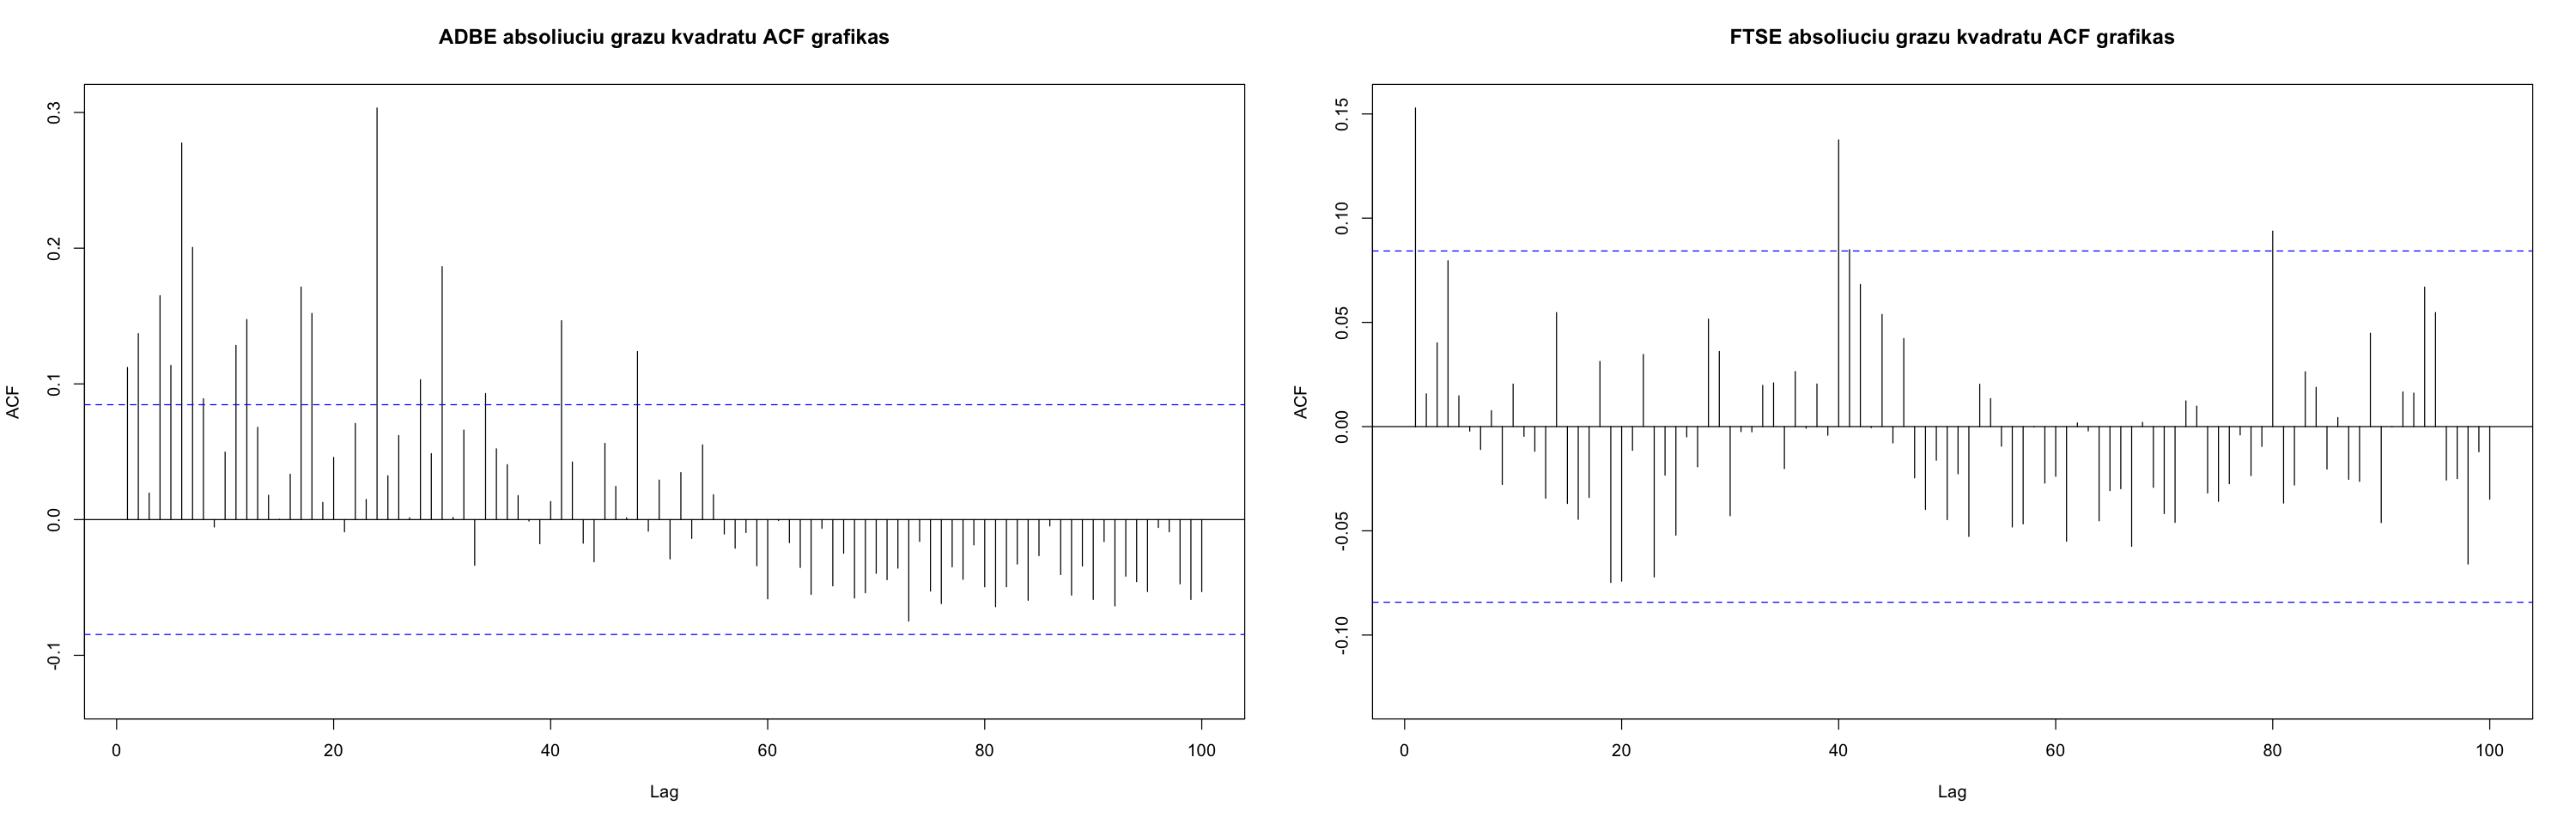

In [81]:
par(mfrow=c(1,2))
Acf(abs(adbe_log_returns_subset)^2, lag.max = 100, main = "ADBE absoliuciu grazu kvadratu ACF grafikas")
Acf(abs(ftse_log_returns_subset)^2, lag.max = 100, main = "FTSE absoliuciu grazu kvadratu ACF grafikas")

## 2.

- Ar nagrinėjamoms logaritminėms grąžoms būdinga ilga atmintis?

Atsakymas: taip, nes koreliacijos gęsta lėtai.

- Ar Taylor’o efektas pastebimas nagrinėjamoms logaritminėms grąžoms?

Taip, tai galime pastebėti lyginant $|r_t| ^{\delta}, \delta = 1$ su $|r_t| ^{\delta}, \delta = 2$.

- Bendru atveju - kas yra Taylor’o efektas?

Stipresnė koreliacija yra absoliutinėms negu kvadratinėms grąžoms.

## 3. 

$r_t$ sudarykite ir įvertinkite ARMA(P,Q) modelį. Apskaičiuokite modelio liekanas $\hat{a}_t=r_y-\hat{μ}_t$, kr $\hat{μ}_t$ yra jūsų įvertintas modelis.

### ADBE

#### Stacionarumas

$\begin{equation*}
    \begin{cases}
    \text{$H_0:$} & \gamma=0\text{ (laiko eilutė turi vienetinę šaknį)}\\
    \text{$H_1:$} & \gamma<0.
        \end{cases}
\end{equation*}$

In [82]:
tseries::adf.test(adbe_log_returns_subset, alternative="stationary", k=trunc((length(adbe_log_returns_subset)-1)^(1/3)))

Warning message in tseries::adf.test(adbe_log_returns_subset, alternative = "stationary", :
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  adbe_log_returns_subset
Dickey-Fuller = -8.6507, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


$H_0$ hipotezę atmetame, grąžos stacionarios.

#### Modelis

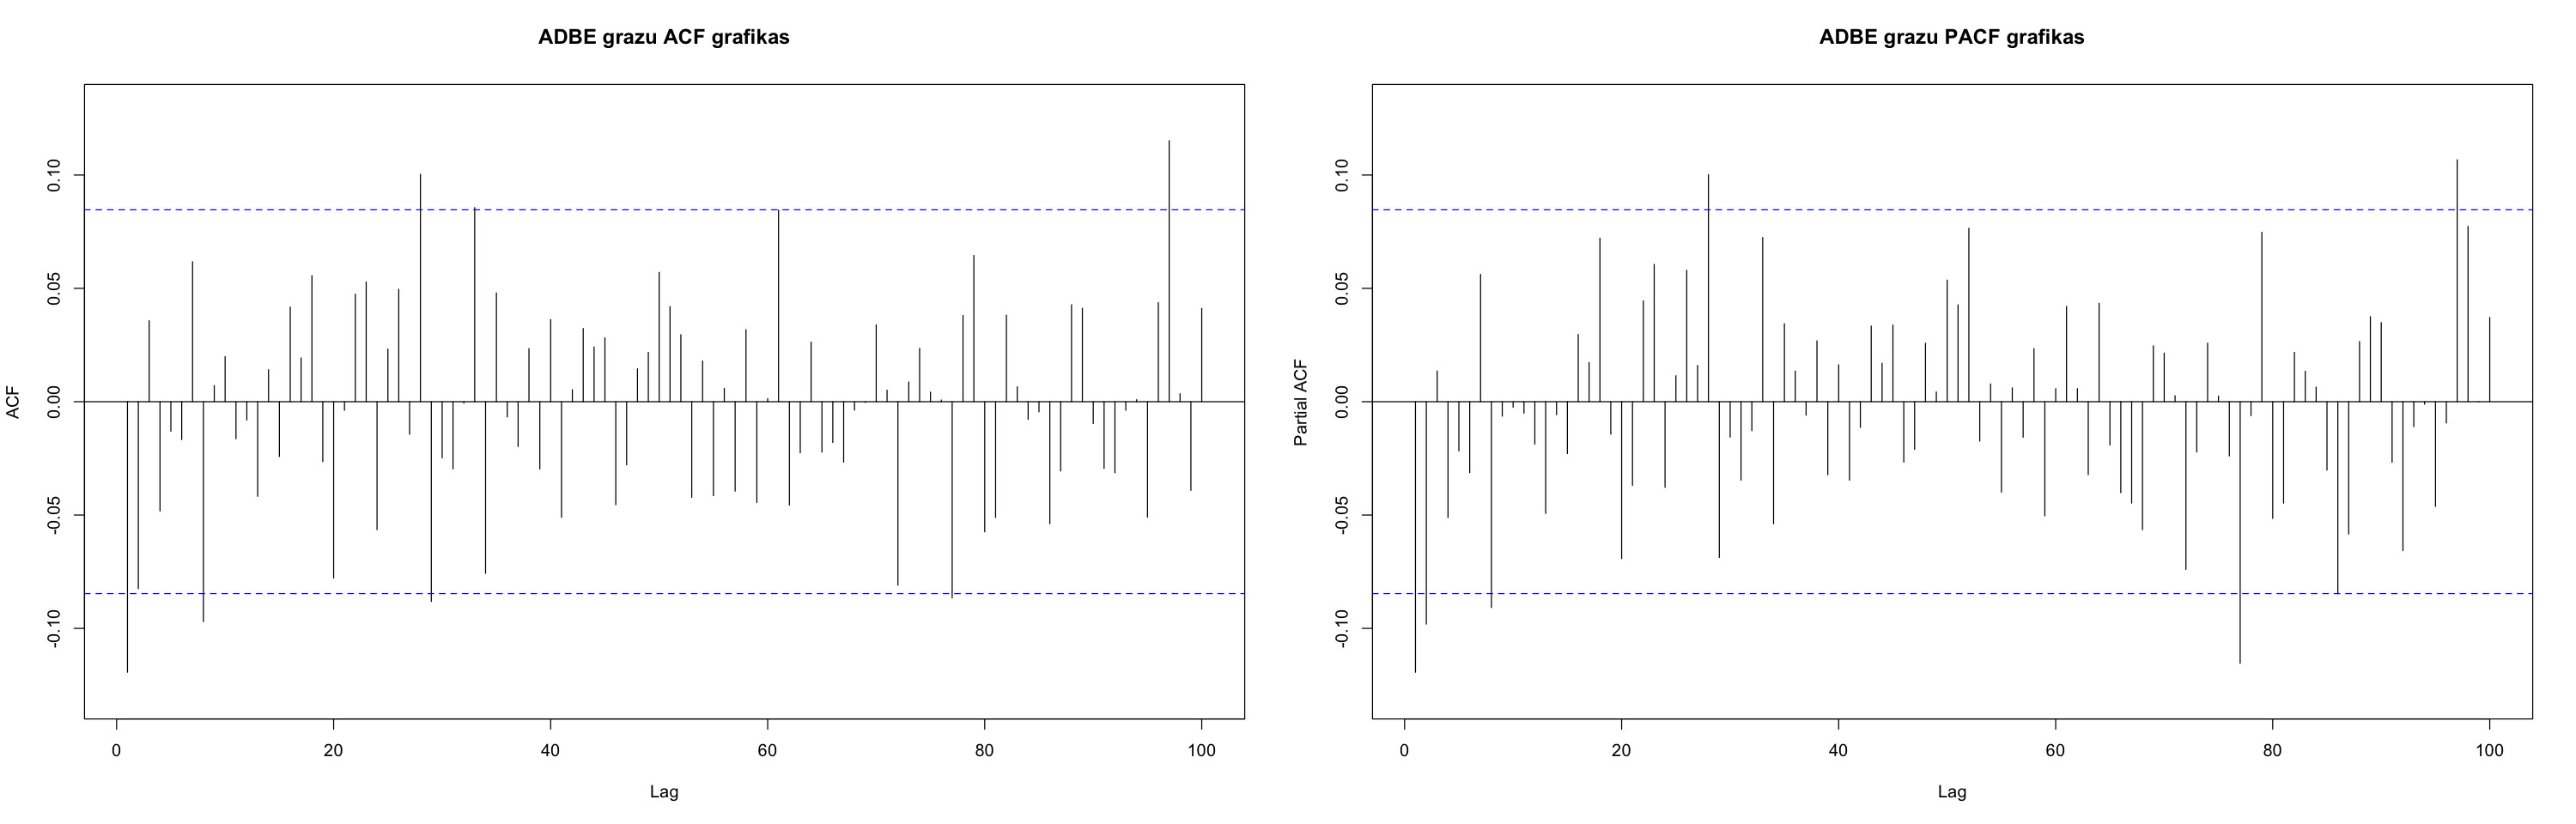

In [83]:
par(mfrow=c(1,2))
Acf(adbe_log_returns_subset, lag.max = 100, main = "ADBE grazu ACF grafikas")
Pacf(adbe_log_returns_subset, lag.max = 100, main = "ADBE grazu PACF grafikas")

Pagal ACF ir PACF grafikus, pasirenkame MA(2) IR AR(3) eiles.

In [84]:
fit_ADBE <- arima(adbe_log_returns_subset, c(3,0,2))

In [85]:
fit_ADBE


Call:
arima(x = adbe_log_returns_subset, order = c(3, 0, 2))

Coefficients:
          ar1     ar2     ar3      ma1      ma2  intercept
      -0.0717  0.5624  0.0947  -0.0572  -0.6627     0.0014
s.e.   0.1994  0.1612  0.0568   0.1948   0.1431     0.0005

sigma^2 estimated as 0.000334:  log likelihood = 1384.6,  aic = -2755.19

Pabandome sudaryti auto.arima modeli.

In [86]:
fit_ADBE_auto <- auto.arima(adbe_log_returns_subset, seasonal = F)

In [87]:
fit_ADBE_auto

Series: adbe_log_returns_subset 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1    mean
      0.5078  -0.6404  0.0014
s.e.  0.2611   0.2352  0.0006

sigma^2 estimated as 0.0003386:  log likelihood=1382.45
AIC=-2756.9   AICc=-2756.83   BIC=-2739.77

In [88]:
fit_ADBE_for_arch <- arima(adbe_log_returns_subset, c(1,0,1))

In [89]:
fit_ADBE_for_arch


Call:
arima(x = adbe_log_returns_subset, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.5078  -0.6404     0.0014
s.e.  0.2611   0.2352     0.0006

sigma^2 estimated as 0.0003367:  log likelihood = 1382.45,  aic = -2756.9

Kadangi AIC mažesnis antrojo modelio, naudosime `auto.arima` sugeneruotą modelį.

#### Liekanų analizė

liekanos 
$a_t$:

In [90]:
head(residuals(fit_ADBE_auto))

A Time Series:
[1]  0.01702200366  0.01253902138  0.01270459031 -0.00003075302  0.00904255830
[6]  0.00275799410


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 8.7333, df = 7, p-value = 0.2724

Model df: 3.   Total lags used: 10



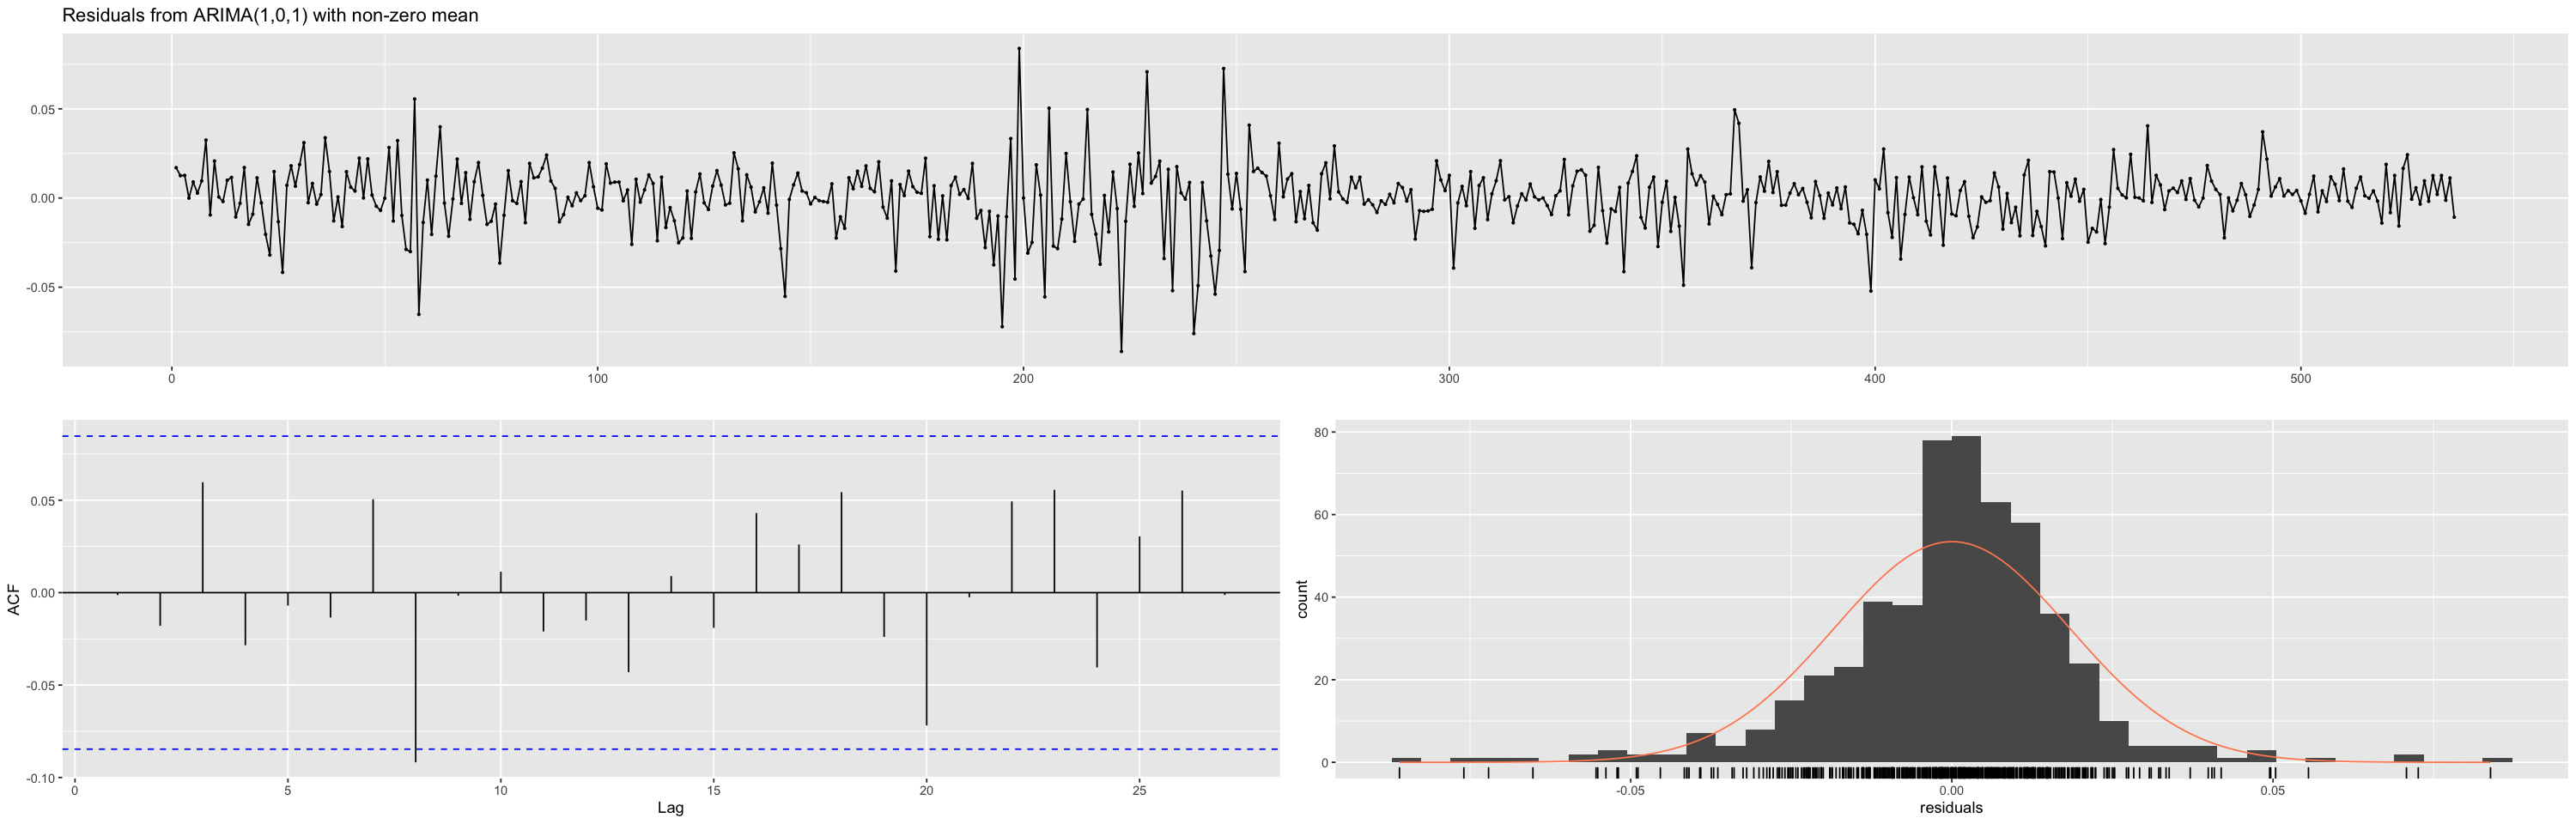

In [91]:
forecast::checkresiduals(fit_ADBE_auto)

Kadangi p-reikšmė yra daugiau negu 0.05, tai teigiame, kad liekanos nekoreliuotos. 

### FTSE

#### Stacionarumas

In [92]:
tseries::adf.test(ftse_log_returns_subset, alternative="stationary", k=trunc((length(ftse_log_returns_subset)-1)^(1/3)))

Warning message in tseries::adf.test(ftse_log_returns_subset, alternative = "stationary", :
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  ftse_log_returns_subset
Dickey-Fuller = -7.73, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


Grąžos stacionarios, $H_0$ atmetame.

#### Modelis

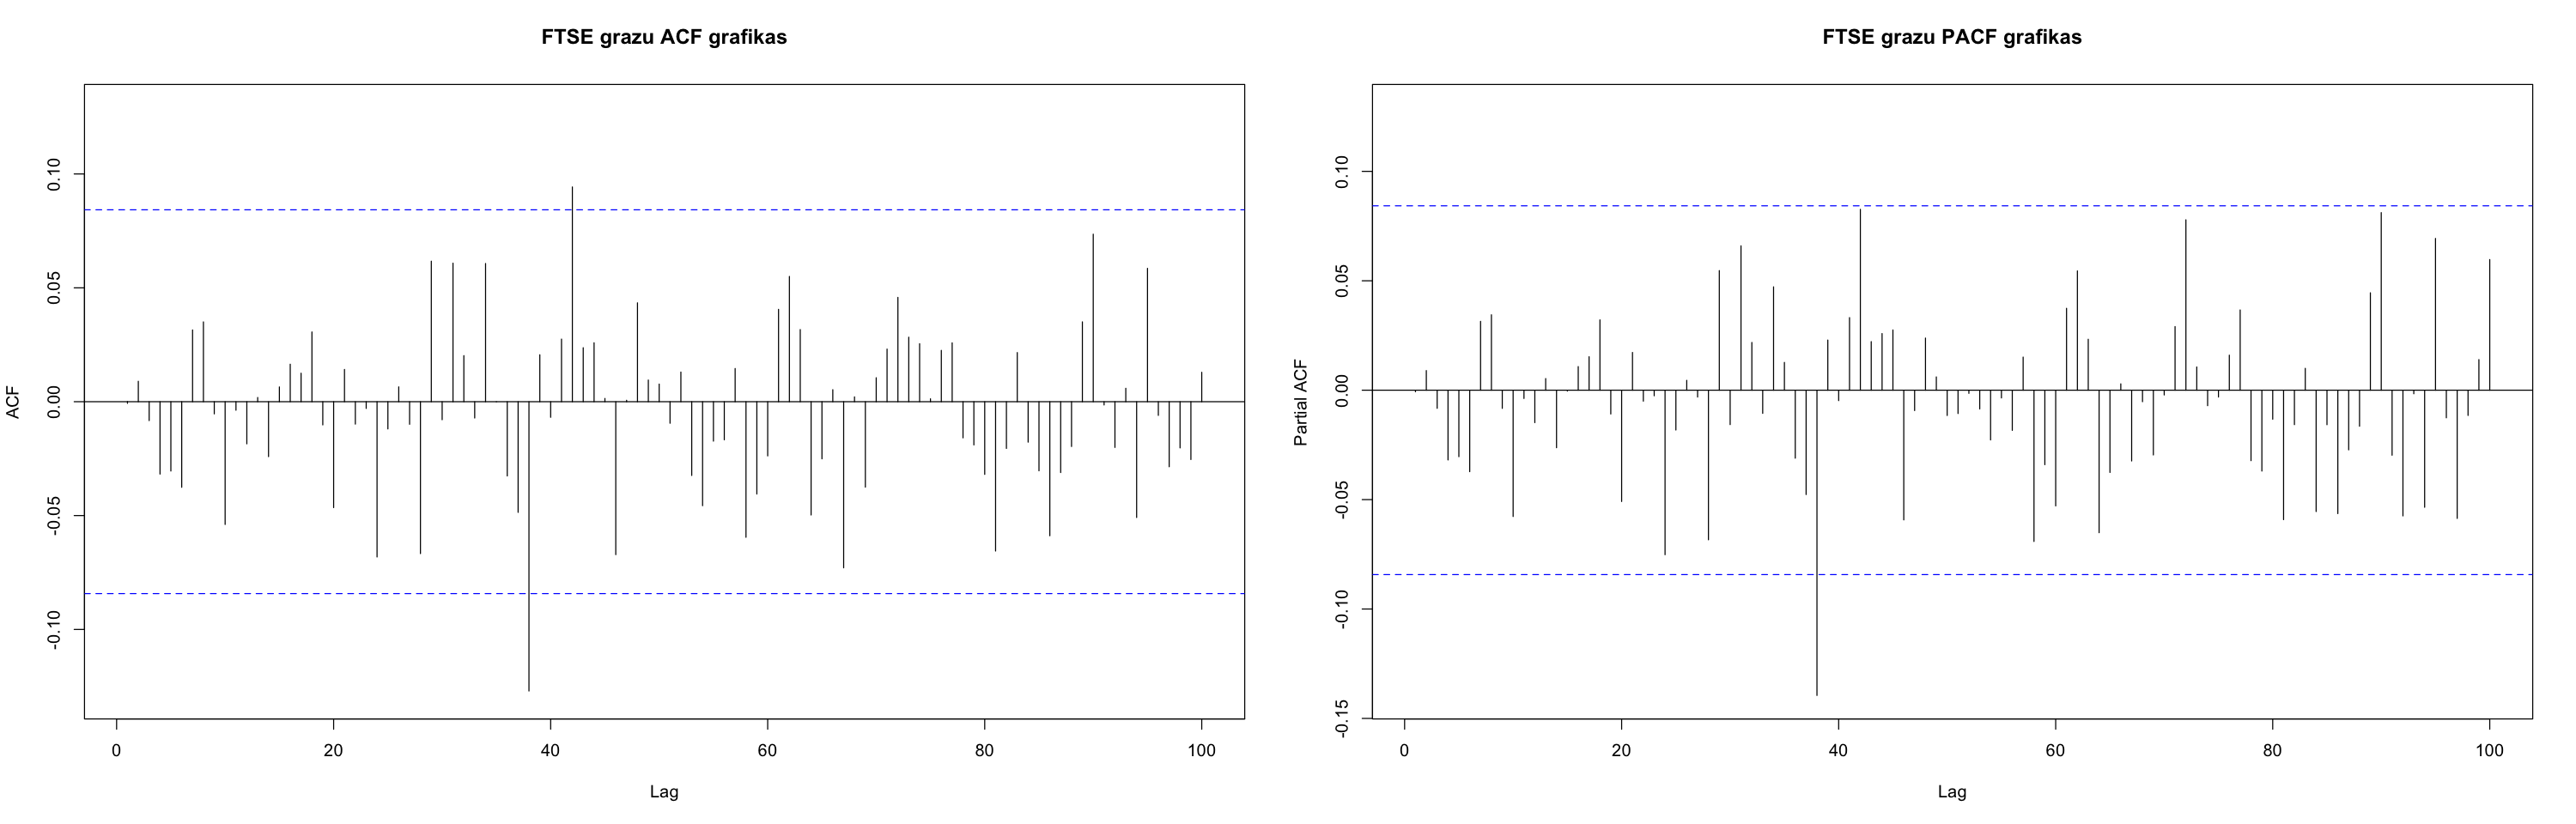

In [93]:
par(mfrow=c(1,2))
Acf(ftse_log_returns_subset, lag.max = 100, main = "FTSE grazu ACF grafikas")
Pacf(ftse_log_returns_subset, lag.max = 100, main = "FTSE grazu PACF grafikas")

Iš ACF ir PACF labai sunku nuspręsti, kurios eilės modelis būtų tinkamiausas, todėl naudojame auto.arima ir parinksime pagal mažiausią AIC reikšmę.

In [94]:
fit_ftse_auto <- auto.arima(ftse_log_returns_subset, seasonal = F)

In [95]:
fit_ftse_auto

Series: ftse_log_returns_subset 
ARIMA(0,0,0) with zero mean 

sigma^2 estimated as 0.00005961:  log likelihood=1863.71
AIC=-3725.43   AICc=-3725.42   BIC=-3721.13

In [96]:
fit_ftse_for_arch <- arima(ftse_log_returns_subset, c(0,0,0), include.mean = F)

In [97]:
fit_ftse_for_arch


Call:
arima(x = ftse_log_returns_subset, order = c(0, 0, 0), include.mean = F)


sigma^2 estimated as 0.00005961:  log likelihood = 1863.71,  aic = -3725.43

#### Liekanų analizė

liekanos 
$a_t$:

In [98]:
head(residuals(fit_ftse_auto))

A Time Series:
[1]  0.003002770  0.003227673  0.003670576 -0.003592603  0.004472540
[6]  0.002261056


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with zero mean
Q* = 4.7636, df = 10, p-value = 0.9064

Model df: 0.   Total lags used: 10



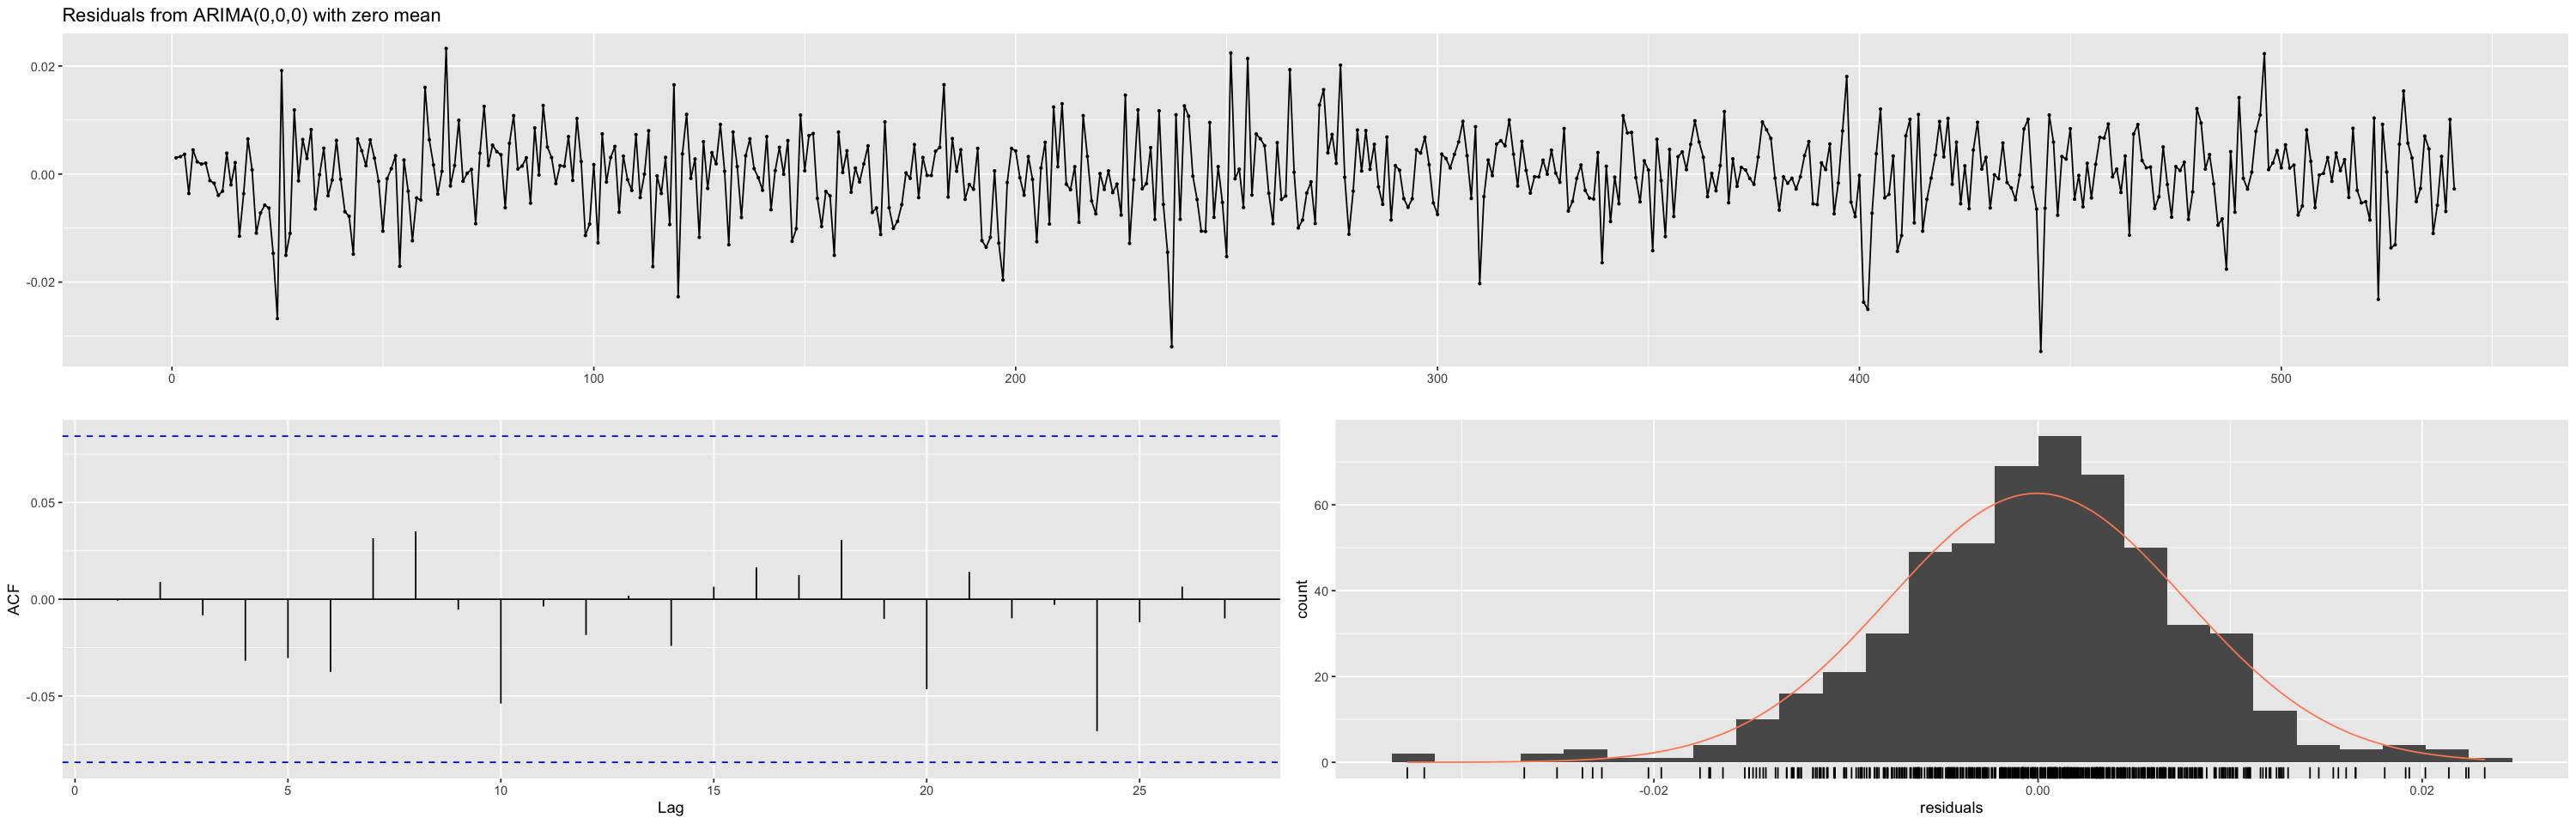

In [99]:
forecast::checkresiduals(fit_ftse_auto)


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with zero mean
Q* = 4.7636, df = 10, p-value = 0.9064

Model df: 0.   Total lags used: 10



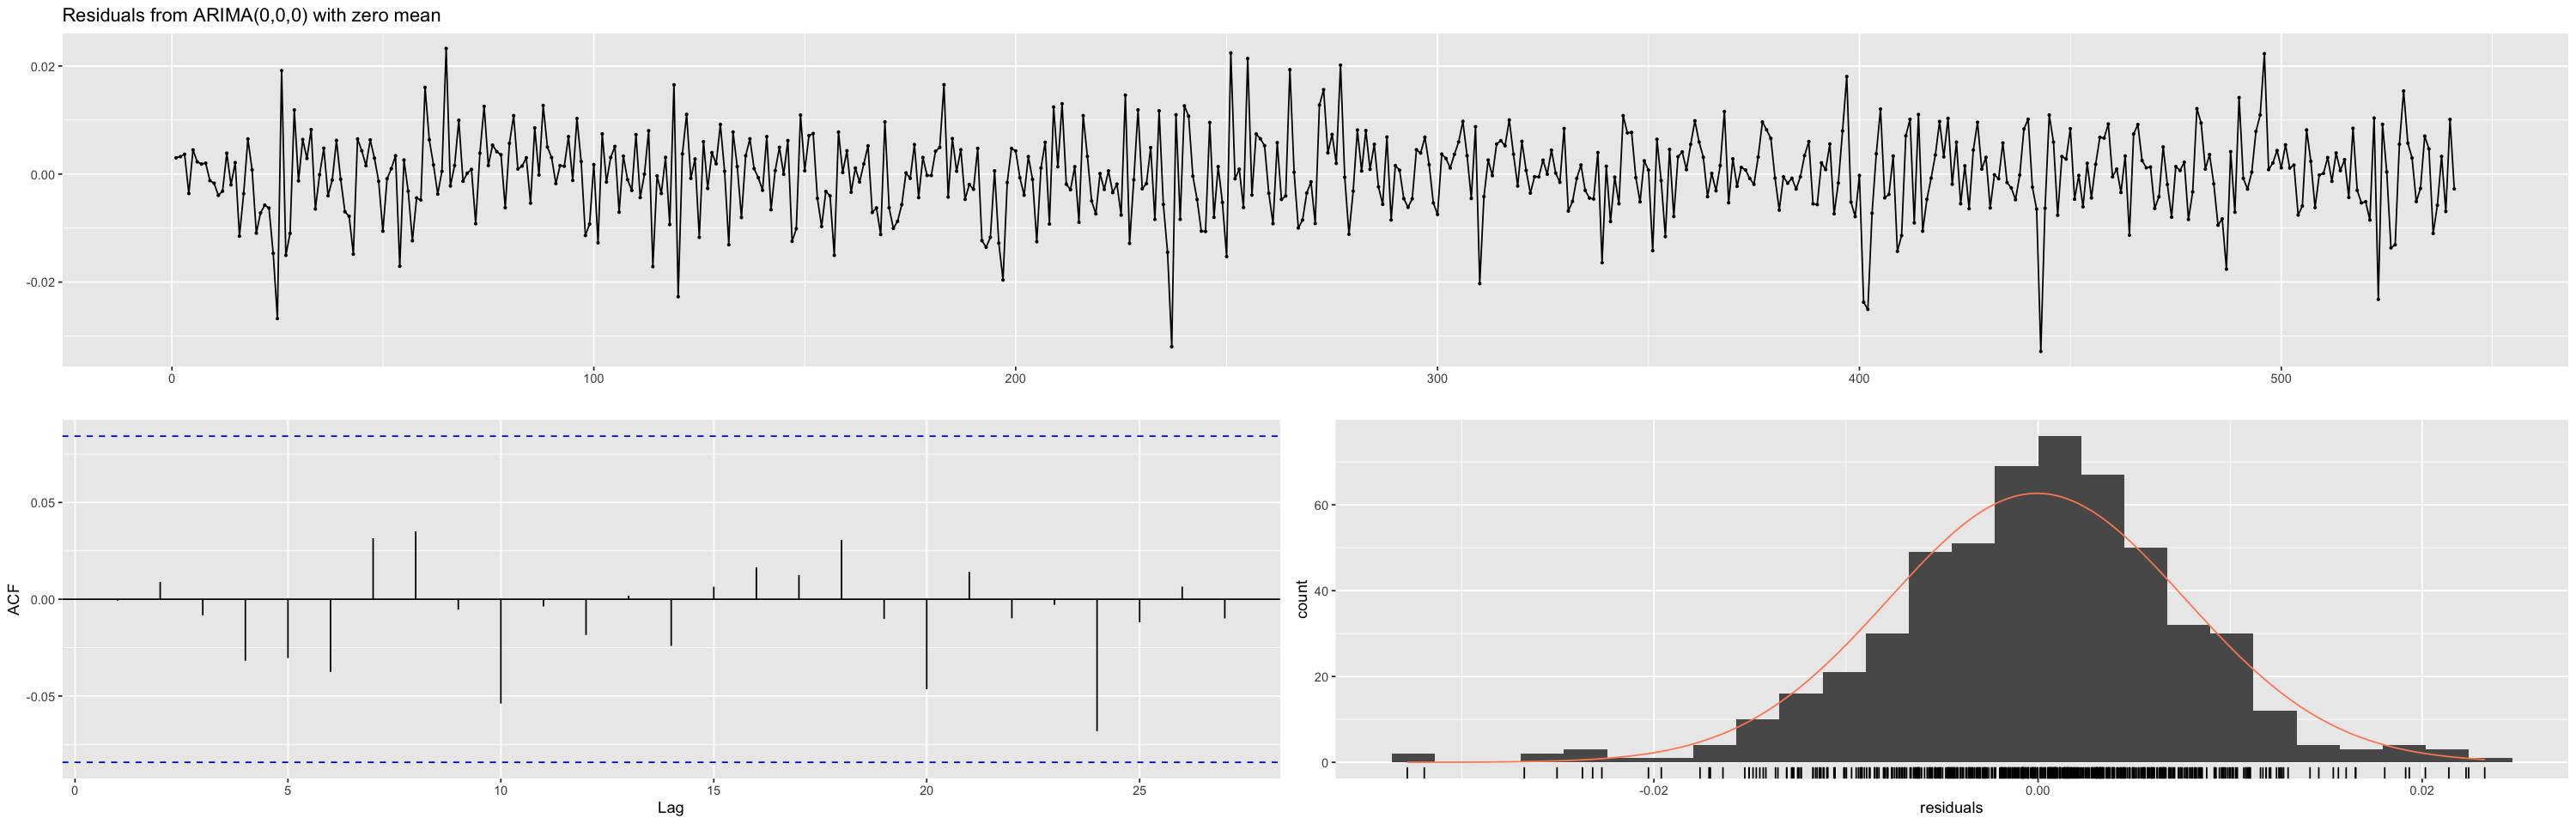

In [100]:
forecast::checkresiduals(fit_ftse_auto)

Kadangi p-reikšmės yra daugiau negu 0.05, tai teigiame, kad liekanos nekoreliuotos, ARMA(0,0) FTSE grąžoms adekvatus.

## 4.
Patikrinkite, ar $r_t$ pasižymi ARCH efektu, t.y.  ar liekanoms atbūdingas sąlyginis heteroskedastišku mas? Ar šios išvados ką nors pasako apie 3 užduotyje sudaryto modelio koeficientų įverčių savybes?

Nulinė hipotezė $H_0: \alpha_1 =...=\alpha_q=0$, kur <br/>
$\begin{cases} 
\epsilon_t = \sigma_t w_t \\
\sigma_t^2 = \omega + \alpha_1 \epsilon_{t-1}^2 + ... + \alpha_q \epsilon_{t-q}^2
\end{cases}$


ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order    PQ    p.value
[1,]     4  30.4 0.00000398
[2,]     8 103.5 0.00000000
[3,]    12 130.6 0.00000000
[4,]    16 133.1 0.00000000
[5,]    20 166.5 0.00000000
[6,]    24 211.2 0.00000000
Lagrange-Multiplier test: 
     order    LM             p.value
[1,]     4 512.4 0.00000000000000000
[2,]     8 145.5 0.00000000000000000
[3,]    12  92.3 0.00000000000000577
[4,]    16  66.2 0.00000002129393650
[5,]    20  45.9 0.00052010632153365
[6,]    24  36.4 0.03747947150782993


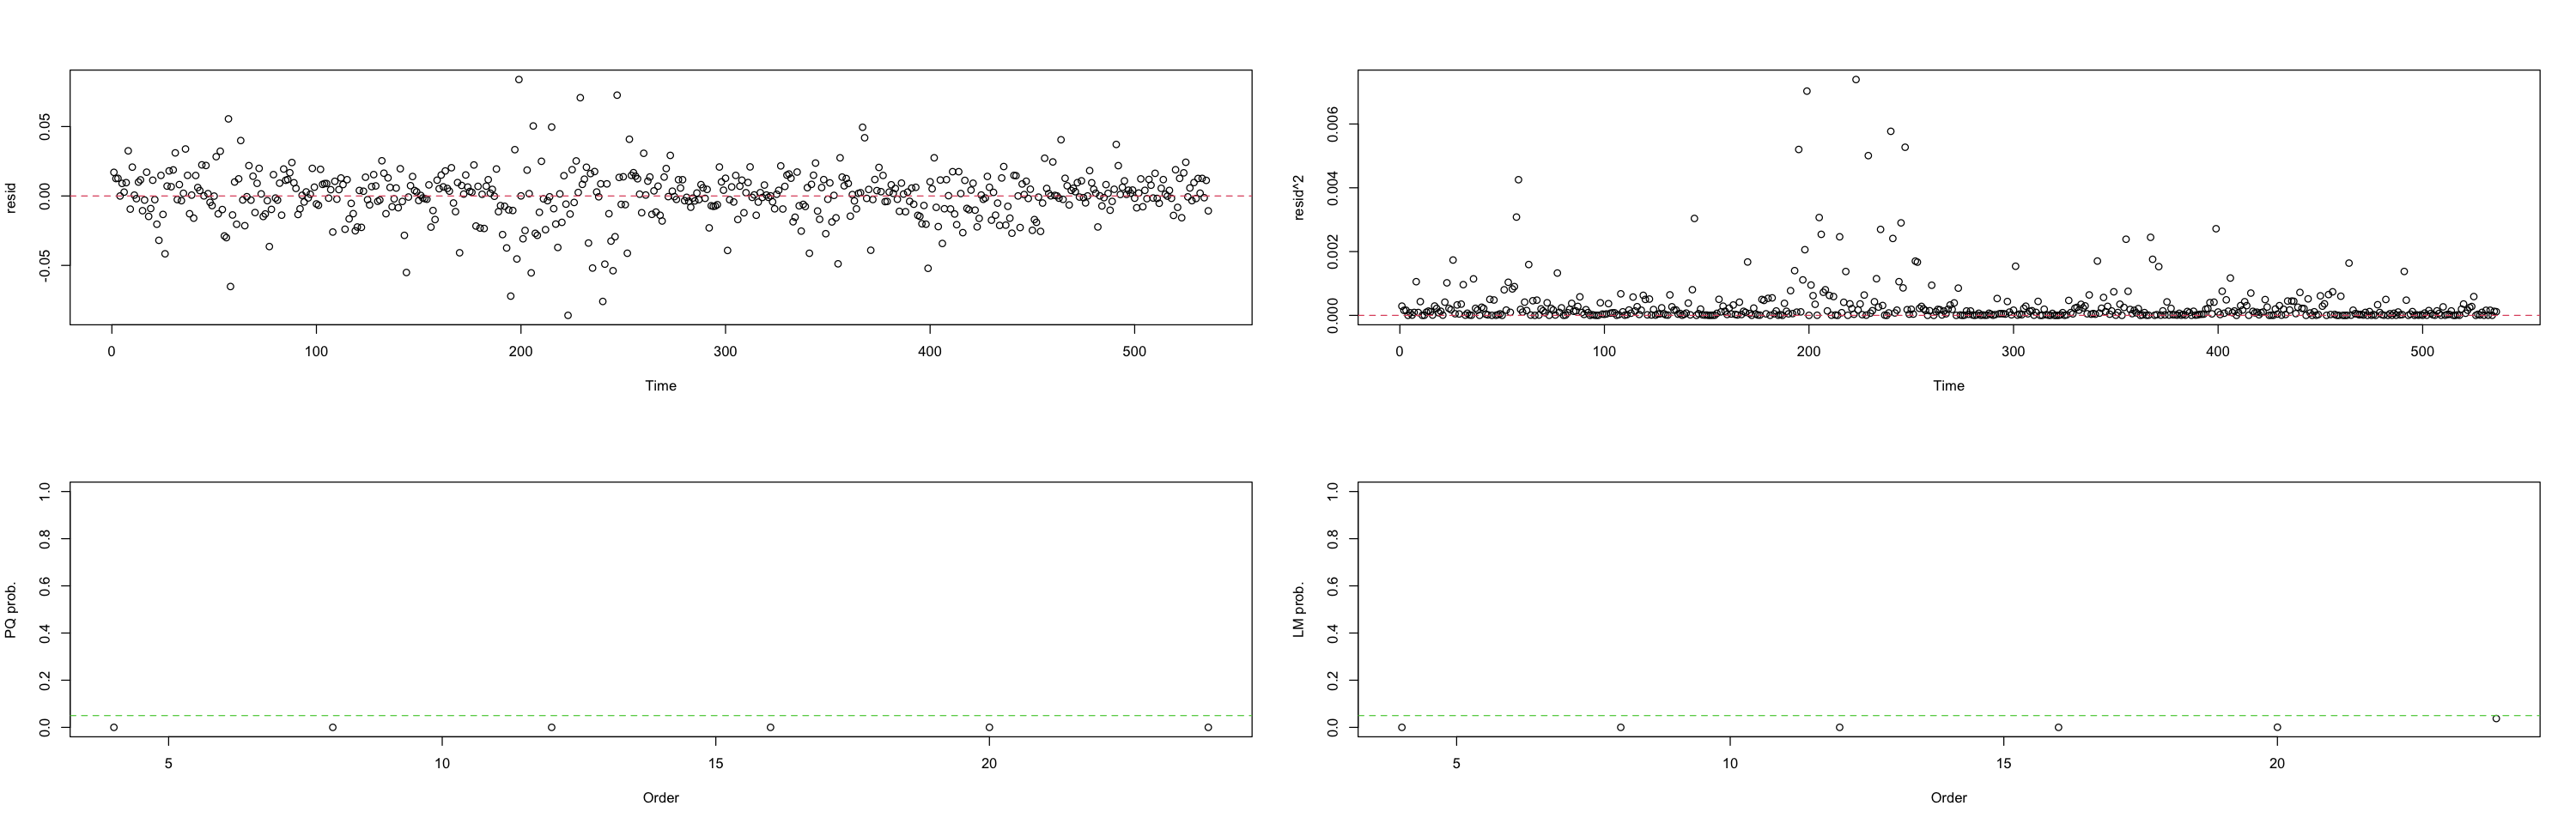

In [101]:
arch.test(fit_ADBE_for_arch, output = TRUE)

Kadangi p-reikšmė < 0.05, tai galime teigti, kad grąžos pasižymi ARCH efektu, t.y liekanoms būdingas sąlyginis heteroskedastiškumas.

Tai reiškia, kad $\hat{\varepsilon}_t$ dydis priklausys nuo jo ankstinių verčių, o $R^2$ yra santykinai didelis.

ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order   PQ p.value
[1,]     4 17.1 0.00187
[2,]     8 17.3 0.02719
[3,]    12 18.0 0.11498
[4,]    16 22.1 0.14028
[5,]    20 29.3 0.08293
[6,]    24 33.1 0.10239
Lagrange-Multiplier test: 
     order    LM            p.value
[1,]     4 289.8 0.0000000000000000
[2,]     8 138.6 0.0000000000000000
[3,]    12  89.4 0.0000000000000214
[4,]    16  63.3 0.0000000688897253
[5,]    20  47.9 0.0002647777501488
[6,]    24  38.3 0.0239315727994995


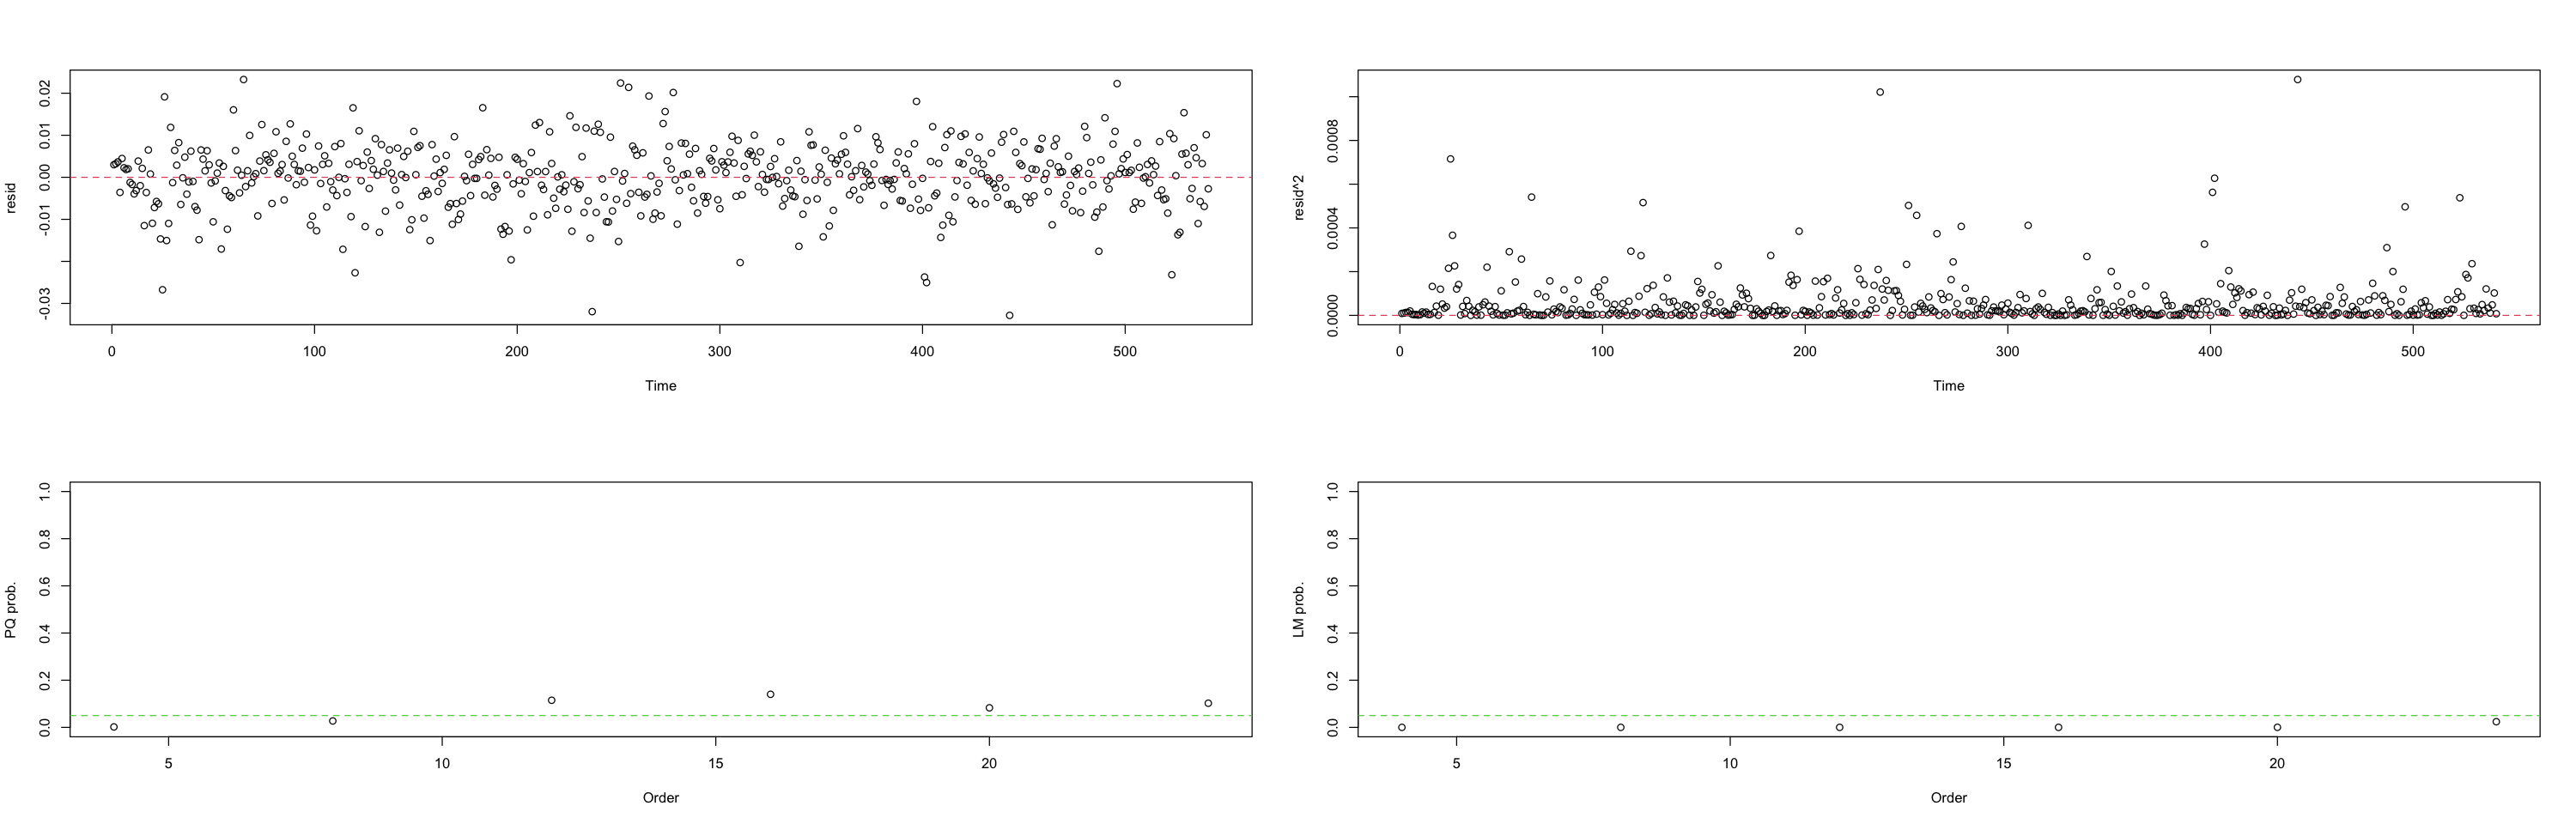

In [102]:
arch.test(fit_ftse_for_arch, output = TRUE)

Testas patvirtina, kad ARCH efektas yra. Nors, Portmanteau testas rezultato neduoda, nulinės hipotezės kai kuriems ankstiniams neatmetame, nes p-reikšmė yra didesnė, nei 0.05. Lagrange multiplier testo koeficientai yra statistiškai reikšmingi, todėl koef. įverčių interpretacija tokia pati, kaip ADBE grąžų atveju.

## 5.

### ADBE

## Mean equation specification/Vidurkio lygtis

In [103]:
adbe_log_returns_subset_data <- as.data.frame(adbe_log_returns_subset)

In [104]:
colnames(adbe_log_returns_subset_data ) <- c("r")

In [105]:
head(adbe_log_returns_subset_data)

r           
2018-01-03  0.018621244
2018-01-04  0.011969659
2018-01-05  0.011504333
2018-01-08 -0.001619974
2018-01-09  0.008931054
2018-01-10  0.002193650

In [106]:
adbe_log_returns_subset_data$r <- ts(adbe_log_returns_subset_data$r)

In [107]:
mean_mdl_adbe <- dynlm(r ~ L(r), data = adbe_log_returns_subset_data)
summary(mean_mdl_adbe)


Time series regression with "ts" data:
Start = 2, End = 536

Call:
dynlm(formula = r ~ L(r), data = adbe_log_returns_subset_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.085867 -0.008349  0.000770  0.010188  0.084061 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.0015524  0.0008009   1.938  0.05310 . 
L(r)        -0.1194513  0.0429889  -2.779  0.00565 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01847 on 533 degrees of freedom
Multiple R-squared:  0.01428,	Adjusted R-squared:  0.01243 
F-statistic: 7.721 on 1 and 533 DF,  p-value: 0.005651


In [108]:
coeftest(mean_mdl_adbe, vcov = vcovHC(mean_mdl_adbe, type = "HC"))


t test of coefficients:

               Estimate  Std. Error t value Pr(>|t|)  
(Intercept)  0.00155239  0.00081621  1.9019  0.05772 .
L(r)        -0.11945130  0.05529871 -2.1601  0.03121 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Tarsime, kad visi koef. yra statistiškai reikšmingi, imant $\alpha = 0.1$

In [109]:
shapiro.test(mean_mdl_adbe$residuals)


	Shapiro-Wilk normality test

data:  mean_mdl_adbe$residuals
W = 0.94676, p-value = 0.000000000000606


p-reikšmė < 0.05, atmetame nulinę hipotezę, kad paklaidos yra normalios.

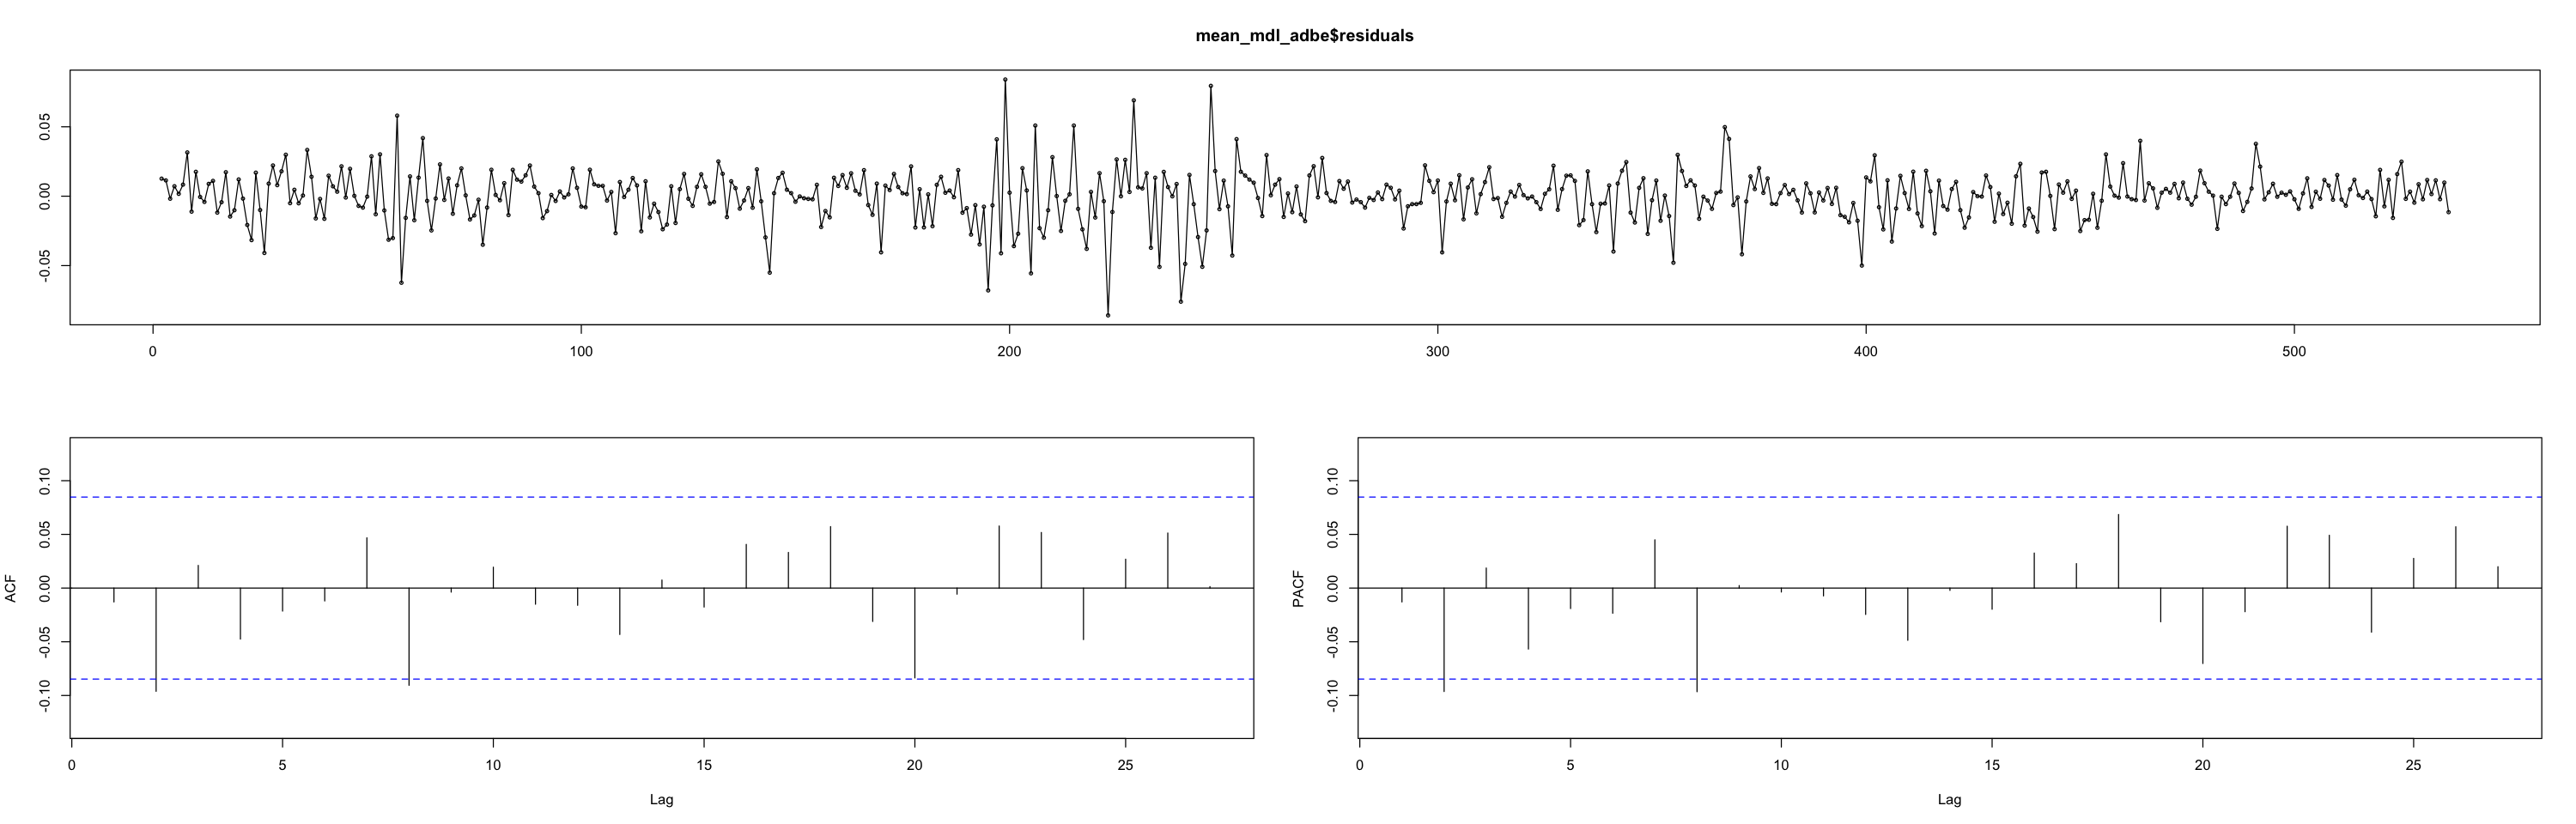

In [110]:
tsdisplay(mean_mdl_adbe$residuals)

In [111]:
Box.test(mean_mdl_adbe$residuals, lag = 15)


	Box-Pierce test

data:  mean_mdl_adbe$residuals
X-squared = 14.03, df = 15, p-value = 0.5232


Nulinės hipotezės, kad atokoreliacijos statistiškai reikšmingai neskiriasi nuo nulio, neatmetame.


	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 13.86, df = 10, p-value = 0.1795


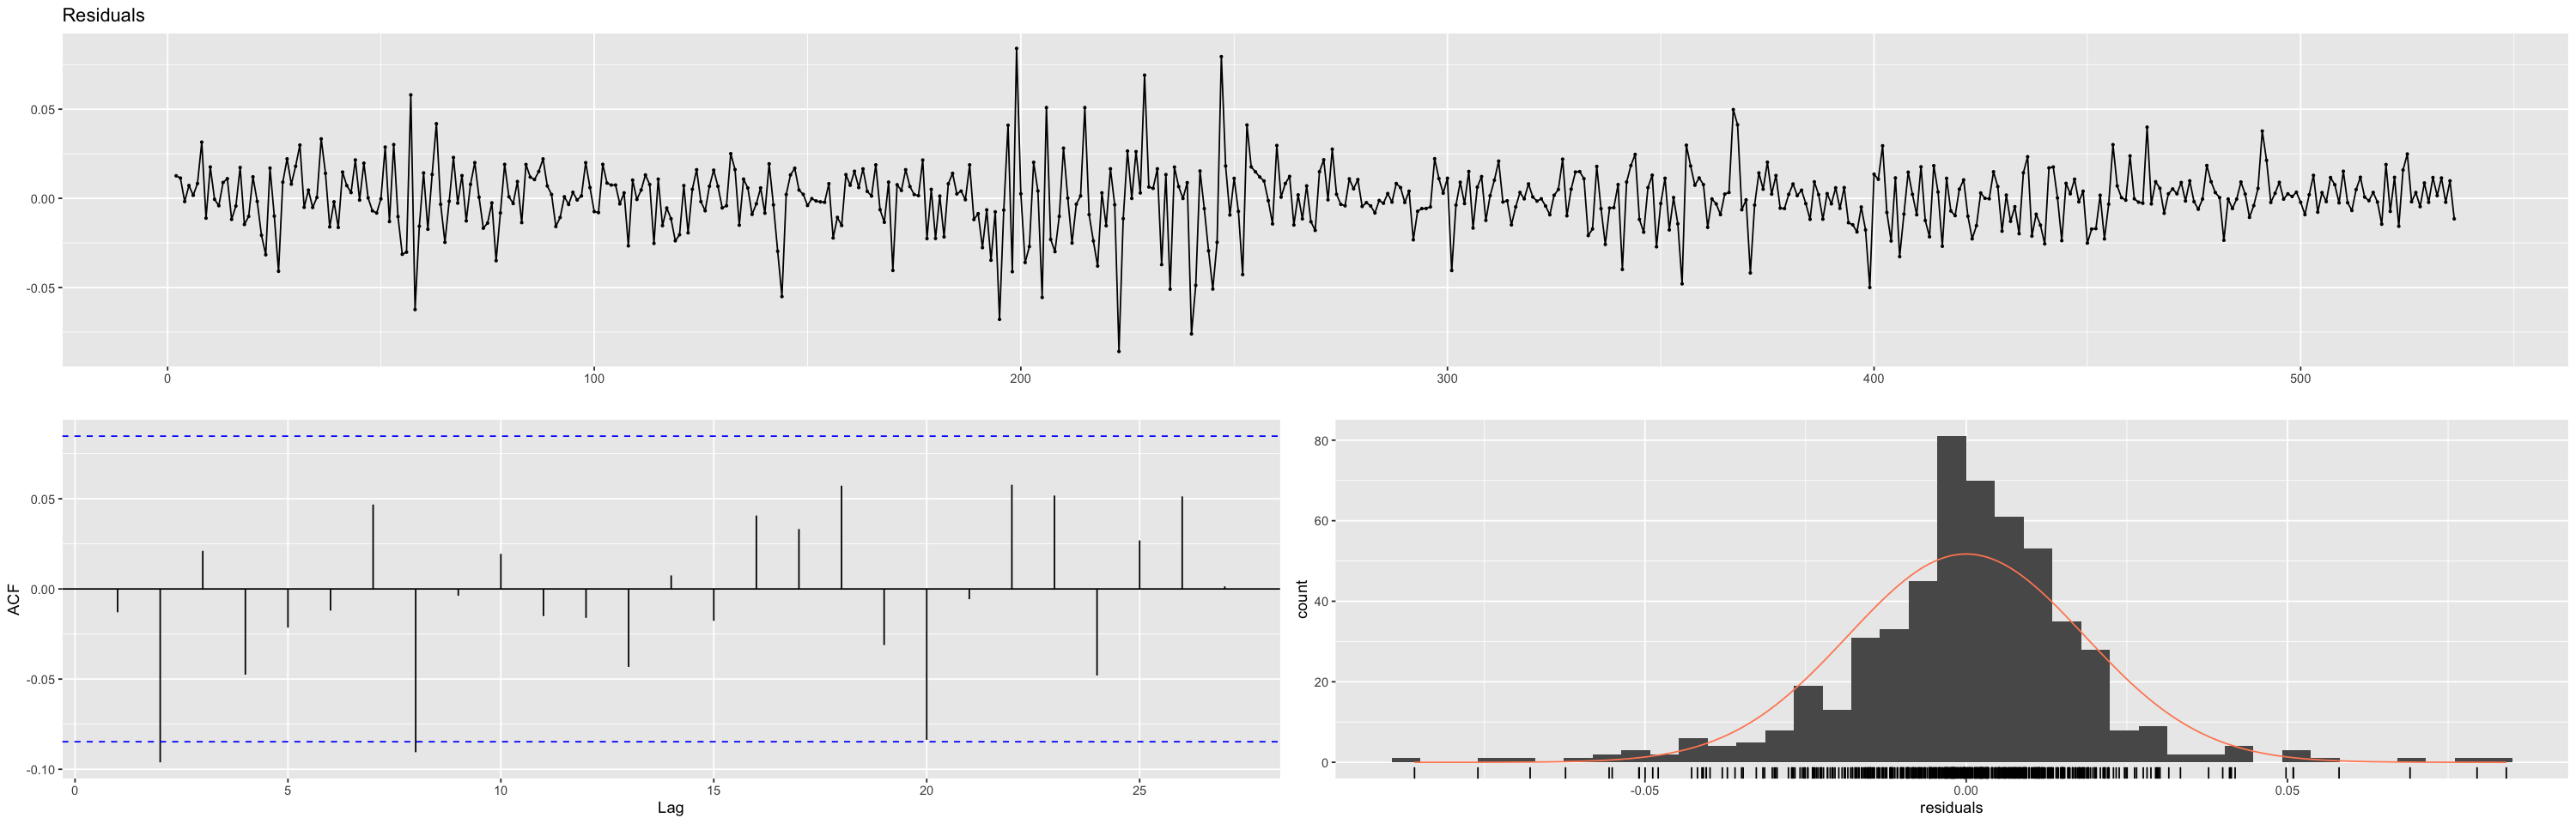

In [112]:
forecast::checkresiduals(mean_mdl_adbe)

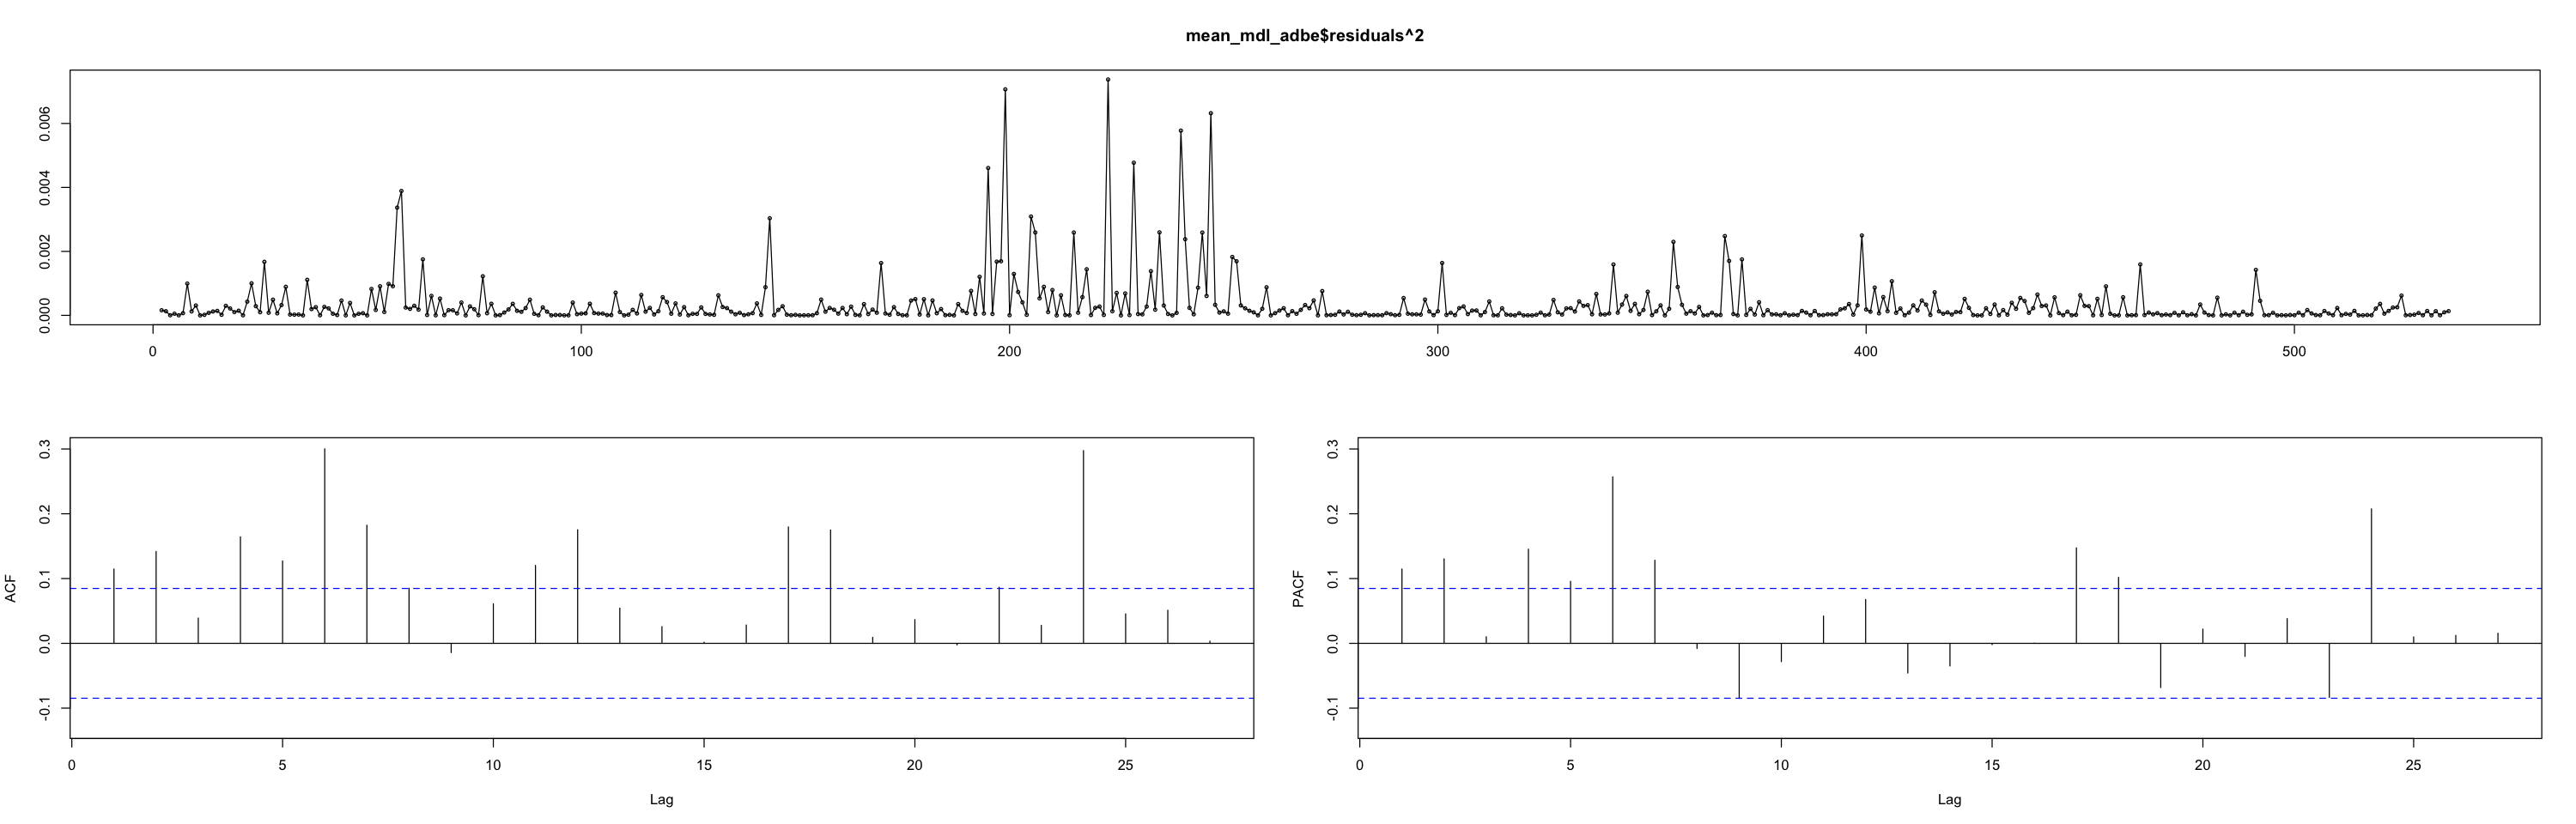

In [113]:
tsdisplay(mean_mdl_adbe$residuals^2)

In [114]:
Box.test(mean_mdl_adbe$residuals^2, lag = 7)


	Box-Pierce test

data:  mean_mdl_adbe$residuals^2
X-squared = 107.81, df = 7, p-value < 0.00000000000000022


Kvadratinės liekanos yra koreliuotos, nes atmetėme nulinę hipotezę.
Atrodo būtų tinkamas $ARCH(7)$ modelis. Tokiu būdų ir parenkame $p$ eilę - sudarydami "Mean model" - ir pagal šio modelio kvadratinių liekanų PACF grafiką.
Tačiau, mano atveju ir po septinto ankstinio, yra statistiškai reikšmingų ankstinių, todėl nesu tikra, ar $ARCH(7)$ modelis yra tinkamas.

Tačiau pati vidurkio lygtis yra adekvati, tai sprendžiu tiek iš `Box-Pierce` testo, tiek iš `Breusch-Godfrey`testo.

#### Modelio sudarymas

Aš naudosiu paketą `fGarch`

ARCH(7) = GARCH(7,0)

In [115]:
mdl_res_adbe <- mean_mdl_adbe$residuals
mdl_arch_adbe <- garchFit(~ garch(7,0), trace = FALSE, data = mdl_res_adbe)

Warning message:
“Using formula(x) is deprecated when x is a character vector of length > 1.
  Consider formula(paste(x, collapse = " ")) instead.”


In [116]:
summary(mdl_arch_adbe)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(7, 0), data = mdl_res_adbe, trace = FALSE) 

Mean and Variance Equation:
 data ~ garch(7, 0)
<environment: 0x7fd9dffb6890>
 [data = mdl_res_adbe]

Conditional Distribution:
 norm 

Coefficient(s):
                     mu                    omega                   alpha1  
0.000000000000000004105  0.000114906663881057360  0.081336677312905780735  
                 alpha2                   alpha3                   alpha4  
0.056642512845480677552  0.013330196957319635775  0.192265051344340964778  
                 alpha5                   alpha6                   alpha7  
0.151528914360451710808  0.140290202722096690735  0.036104126688839673076  

Std. Errors:
 based on Hessian 

Error Analysis:
                      Estimate              Std. Error  t value   Pr(>|t|)    
mu     0.000000000000000004105 0.000643615038374894350    0.000    1.00000    
omega  0.000114906663881057360 0.000020475066836627507    5.612 0.00000002 ***


`Jarque-Bera` ir `Shapiro-Wilk` testai atmeta $H_0$ hipotezę, kad liekanos yra normalios. 
Tačiau `Ljung-Box` testas netameta $H_0$, jog liekanos yra baltasis triukšmas. Liekanos nėra  autokoreliuotos.

#### ARCH efektai

`LM Arch` testas teigia, kad ARCH efektų nebėra. 

Kadangi prieš tai grąžoms buvo būdingi ARCH efektai, modelį ARCH(7) sudarinėti buvo verta.

____

Patyrinėjus daugiau literatūros apie ARCH ir GARCH modelius, rekomenduojama vietoj aukštesnės eilės ARCH modelio sudaryti populiarųjį GARCH(1,1).
Rėmiausi http://www.iam.fmph.uniba.sk/institute/stehlikova/ts16/lectures/7_garch.pdf

In [117]:
mdl_arch_adbe_garch <- garchFit(~ garch(1,1), trace = FALSE, data = mdl_res_adbe)

Warning message:
“Using formula(x) is deprecated when x is a character vector of length > 1.
  Consider formula(paste(x, collapse = " ")) instead.”


In [118]:
summary(mdl_arch_adbe_garch)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = mdl_res_adbe, trace = FALSE) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x7fd9de78b3b8>
 [data = mdl_res_adbe]

Conditional Distribution:
 norm 

Coefficient(s):
                     mu                    omega                   alpha1  
0.000000000000000004105  0.000014047781703177443  0.118434149097045124388  
                  beta1  
0.841749409203765619480  

Std. Errors:
 based on Hessian 

Error Analysis:
                      Estimate              Std. Error  t value
mu     0.000000000000000004105 0.000669012485739059947    0.000
omega  0.000014047781703177443 0.000005118778737613582    2.744
alpha1 0.118434149097045124388 0.029102904482999635699    4.069
beta1  0.841749409203765619480 0.032396897982409370020   25.982
                   Pr(>|t|)    
mu                  1.00000    
omega               0.00606 ** 
alpha1            0.0000471 ***
beta1  < 0.0000000000000002 ***
---
Signi

Kaip ir ARCH(7) modelio atveju `Jarque-Bera` ir `Shapiro-Wilk` testai atmeta $H_0$ hipotezę, kad liekanos yra normalios. 
Tačiau `Ljung-Box` testas netameta $H_0$, jog liekanos yra baltasis triukšmas. Liekanos nėra  autokoreliuotos.

#### ARCH EFEKTAI

`LM Arch` testas teigia, kad ARCH efektų nebėra. 

Modelį sudarinėti buvo verta.

### FTSE

In [119]:
ftse_log_returns_subset_data <- as.data.frame(ftse_log_returns_subset)
colnames(ftse_log_returns_subset_data ) <- c("r")
ftse_log_returns_subset_data$r <- ts(ftse_log_returns_subset_data$r)

In [120]:
mean_mdl_ftse <- dynlm(r ~ L(r), data =ftse_log_returns_subset_data)
summary(mean_mdl_ftse)


Time series regression with "ts" data:
Start = 2, End = 541

Call:
dynlm(formula = r ~ L(r), data = ftse_log_returns_subset_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.032789 -0.004538  0.000567  0.004740  0.023314 

Coefficients:
               Estimate  Std. Error t value Pr(>|t|)
(Intercept) -0.00005753  0.00033311  -0.173    0.863
L(r)        -0.00071800  0.04311164  -0.017    0.987

Residual standard error: 0.007741 on 538 degrees of freedom
Multiple R-squared:  5.156e-07,	Adjusted R-squared:  -0.001858 
F-statistic: 0.0002774 on 1 and 538 DF,  p-value: 0.9867


In [121]:
coeftest(mean_mdl_ftse, vcov = vcovHC(mean_mdl_ftse, type = "HC"))


t test of coefficients:

                Estimate   Std. Error t value Pr(>|t|)
(Intercept) -0.000057527  0.000331952 -0.1733   0.8625
L(r)        -0.000718001  0.053141506 -0.0135   0.9892


Koeficientai nereikšmingi.

In [122]:
mean_mdl_ftse_2 <- dynlm(r ~ 1, data =ftse_log_returns_subset_data)
summary(mean_mdl_ftse_2)


Time series regression with "ts" data:
Start = 1, End = 541

Call:
dynlm(formula = r ~ 1, data = ftse_log_returns_subset_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.032790 -0.004531  0.000571  0.004708  0.023308 

Coefficients:
               Estimate  Std. Error t value Pr(>|t|)
(Intercept) -0.00005184  0.00033223  -0.156    0.876

Residual standard error: 0.007727 on 540 degrees of freedom


In [123]:
coeftest(mean_mdl_ftse_2, vcov = vcovHC(mean_mdl_ftse_2, type = "HC"))


t test of coefficients:

                Estimate   Std. Error t value Pr(>|t|)
(Intercept) -0.000051836  0.000331922 -0.1562    0.876


Taip pat nereikšmingas koeficientas.

In [124]:
shapiro.test(mean_mdl_ftse$residuals)


	Shapiro-Wilk normality test

data:  mean_mdl_ftse$residuals
W = 0.98251, p-value = 0.00000446


p-reikšmė < 0.05, atmetame nulinę hipotezę, kad paklaidos yra normalios.

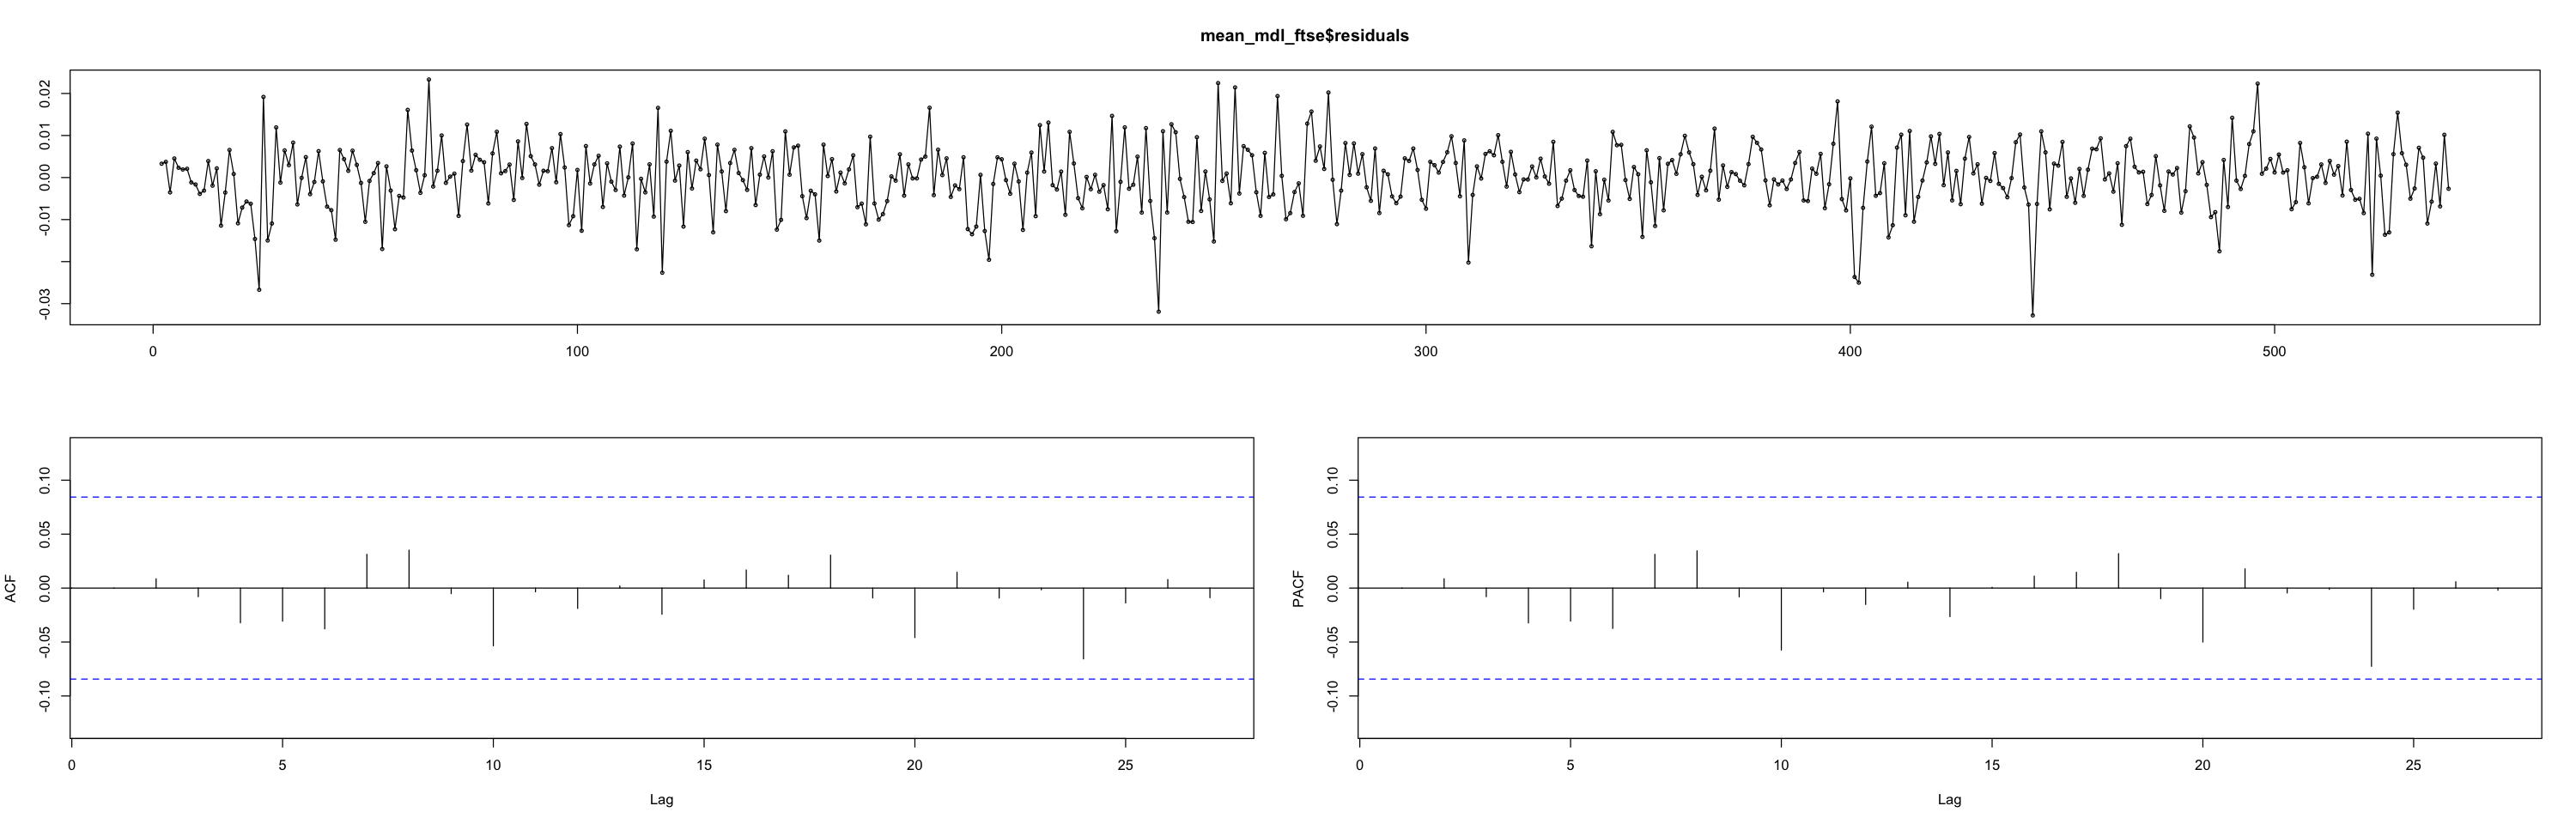

In [125]:
tsdisplay(mean_mdl_ftse$residuals)

In [126]:
Box.test(mean_mdl_ftse$residuals, lag = 15)


	Box-Pierce test

data:  mean_mdl_ftse$residuals
X-squared = 5.2292, df = 15, p-value = 0.99


Nulinės hipotezės, kad atokoreliacijos statistiškai reikšmingai neskiriasi nuo nulio, neatmetame.

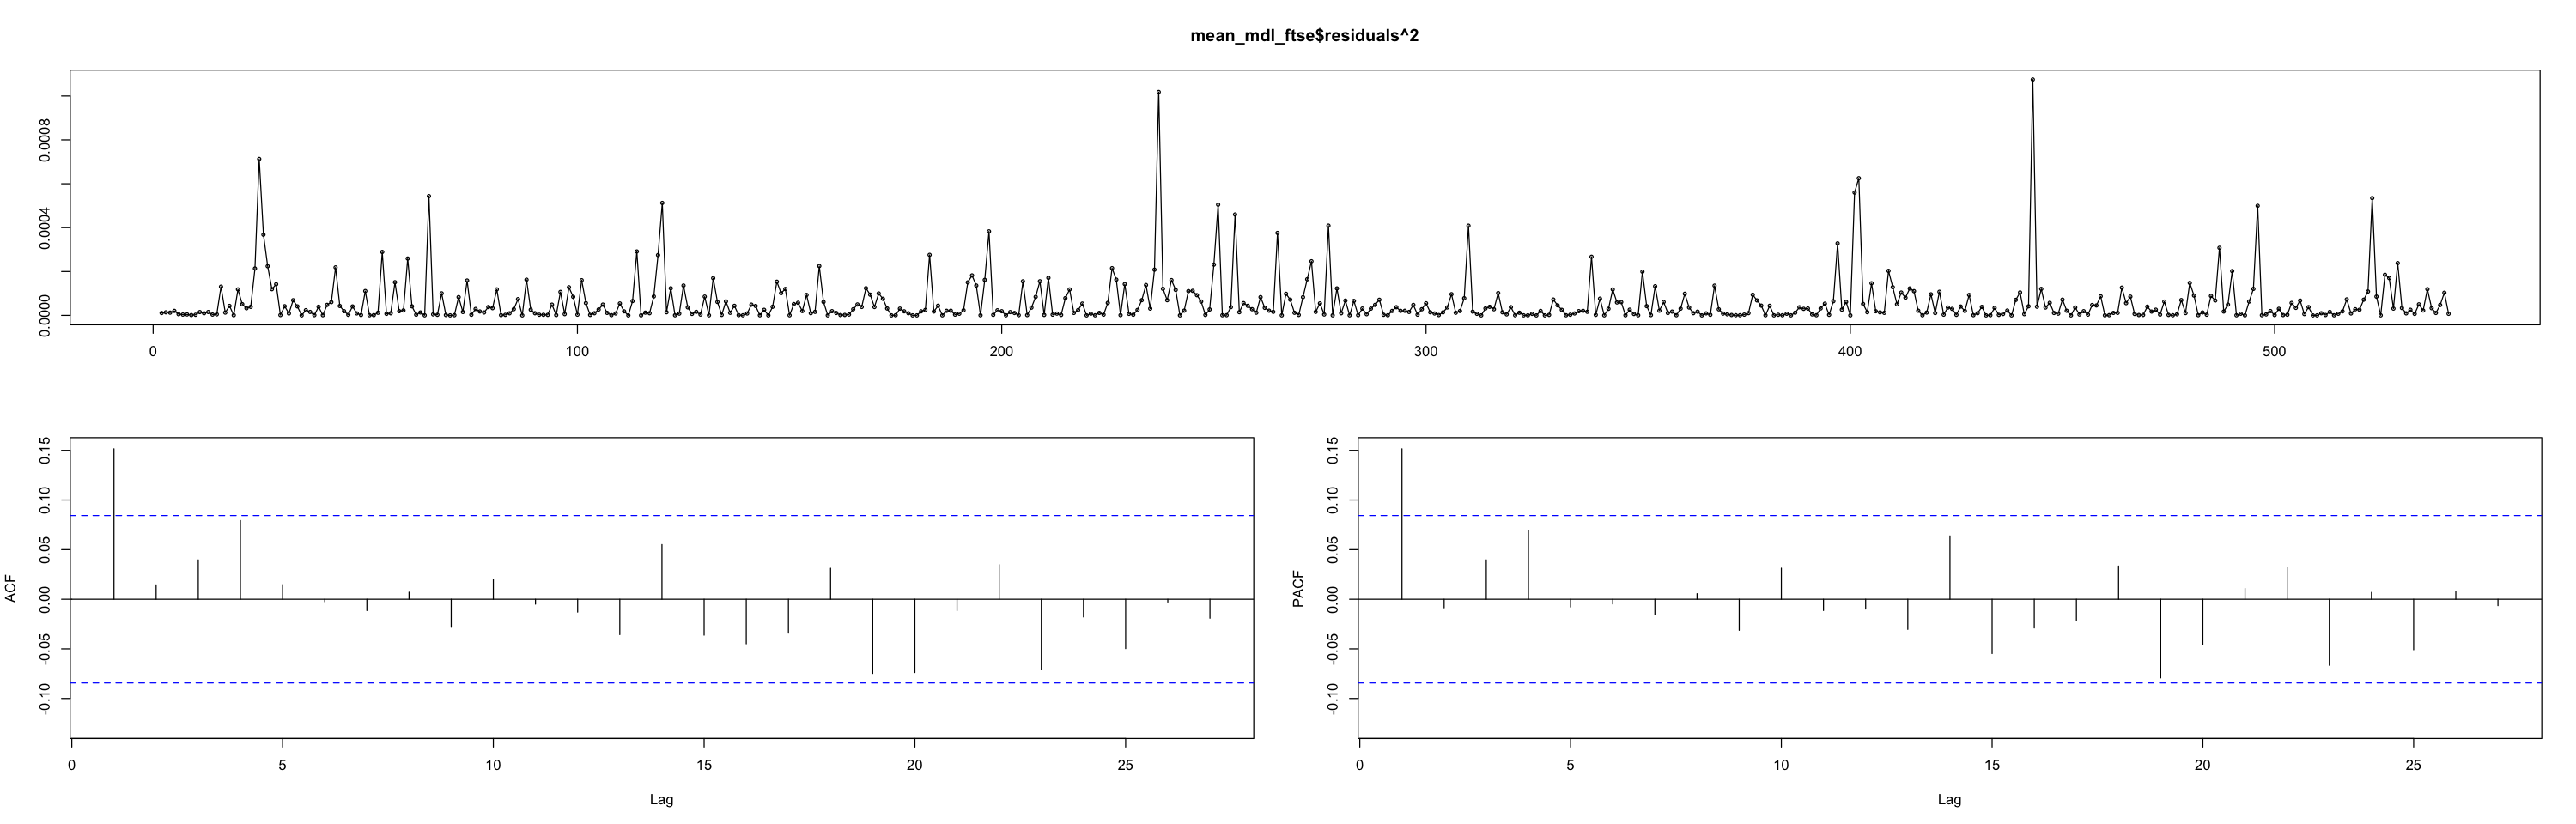

In [127]:
tsdisplay(mean_mdl_ftse$residuals^2)

In [128]:
Box.test(mean_mdl_adbe$residuals^2, lag =  1)


	Box-Pierce test

data:  mean_mdl_adbe$residuals^2
X-squared = 7.0531, df = 1, p-value = 0.007913


Kvadratinės liekanos yra koreliuotos, nes atmetėme nulinę hipotezę.
Atrodo būtų tinkamas $ARCH(1)$ modelis, nustatome žiūrint į mean model kvadratinių liekanų PACF grafiką.

#### Modelio sudarymas

In [129]:
mdl_res_ftse <- mean_mdl_ftse$residuals
mdl_arch_ftse<- garchFit(~ garch(1,0), trace = FALSE, data = mdl_res_ftse)

Warning message:
“Using formula(x) is deprecated when x is a character vector of length > 1.
  Consider formula(paste(x, collapse = " ")) instead.”


In [130]:
summary(mdl_arch_ftse)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 0), data = mdl_res_ftse, trace = FALSE) 

Mean and Variance Equation:
 data ~ garch(1, 0)
<environment: 0x7fd9de8e5020>
 [data = mdl_res_ftse]

Conditional Distribution:
 norm 

Coefficient(s):
                      mu                     omega                    alpha1  
0.0000000000000000026091  0.0000459080808995267304  0.2460400393732419532800  

Std. Errors:
 based on Hessian 

Error Analysis:
                      Estimate              Std. Error  t value
mu     0.000000000000000002609 0.000312527290324845868    0.000
omega  0.000045908080899526730 0.000003969134025919300   11.566
alpha1 0.246040039373241953280 0.074372418129625944561    3.308
                   Pr(>|t|)    
mu                 1.000000    
omega  < 0.0000000000000002 ***
alpha1             0.000939 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 1870.658    normalized:  3.464182 

Description:
 Sun Oct 25 10:43

Kaip ir ADBE ARCH(7) modelio atveju, rezultatai labai panašūs. FTSE ARCH(1) atveju: `Jarque-Bera` ir `Shapiro-Wilk` testai atmeta $H_0$ hipotezę, kad liekanos yra normalios. 
Tačiau `Ljung-Box` testas netameta $H_0$, jog liekanos yra baltasis triukšmas. Liekanos nėra  autokoreliuotos.

#### ARCH efektai

`LM Arch ` testas teigia, kad ARCH efektų nėra.

Kadangi grąžoms buvo būdingi ARCH efektai, sudaryti ARCH(1) modelį buvo verta.

## 6.

### ADBE

In [131]:
adbe_model <- ugarchspec(variance.model = list(garchOrder = c(7, 0), 
                                         submodel = NULL, 
                                         external.regressors = NULL, 
                                         variance.targeting = FALSE), 

                   mean.model     = list(armaOrder = c(1, 1), 
                                         include.mean = TRUE))

adbe_model_fit <- ugarchfit(spec = adbe_model, data = adbe_log_returns_subset_data, solver.control = list(trace=0))

In [132]:
adbe_model_fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(7,0)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.002047    0.000553  3.69934 0.000216
ar1     0.428710    0.543671  0.78855 0.430377
ma1    -0.507343    0.522746 -0.97054 0.331780
omega   0.000117    0.000021  5.69016 0.000000
alpha1  0.075475    0.044880  1.68169 0.092629
alpha2  0.041983    0.056109  0.74823 0.454320
alpha3  0.020118    0.051052  0.39407 0.693532
alpha4  0.201194    0.075538  2.66347 0.007734
alpha5  0.149447    0.055602  2.68779 0.007193
alpha6  0.142539    0.055447  2.57075 0.010148
alpha7  0.046213    0.049227  0.93877 0.347847

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.002047    0.000553  3.70317 0.000213
ar1     

Iš `Ljung-Box` testo matome, kad p-reikšmės > 0.05, todėl liekanos yra baltasis triukšmas (liekanos nėra autokoreliuotos). `Weighted ARCH LM` testas teigia, kad ARCH efektų nėra.

___

#### Modelio ARMA(P,Q)−GARCH(p) sudarymas

In [133]:
adbe_model_garch <- ugarchspec(variance.model = list(garchOrder = c(1, 1), 
                                         submodel = NULL, 
                                         external.regressors = NULL, 
                                         variance.targeting = FALSE), 

                   mean.model     = list(armaOrder = c(1, 1), 
                                         include.mean = TRUE))

adbe_model_fit_garch <- ugarchfit(spec = adbe_model_garch, data = adbe_log_returns_subset_data, solver.control = list(trace=0))

In [134]:
adbe_model_fit_garch


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.002120    0.000526   4.0296 0.000056
ar1     0.531018    0.290025   1.8309 0.067109
ma1    -0.627782    0.265658  -2.3631 0.018122
omega   0.000014    0.000003   4.2414 0.000022
alpha1  0.121071    0.016731   7.2364 0.000000
beta1   0.840790    0.022362  37.5998 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.002120    0.000549   3.8634 0.000112
ar1     0.531018    0.278926   1.9038 0.056937
ma1    -0.627782    0.249327  -2.5179 0.011805
omega   0.000014    0.000006   2.2092 0.027159
alpha1  0.121071    0.035729   3.3885 0.000703
beta1   0.840790    0.032929  25.5336 0.000000

LogLike

Iš `Ljung-Box` testo matome, kad p-reikšmės > 0.05, todėl liekanos yra baltasis triukšmas (liekanos nėra autokoreliuotos). `Weighted ARCH LM` testas teigia, kad ARCH efektų nėra. 

<span style="color:red"> **Svarbus pastebėjimas:** </span> <br>
Tiek ARCH(7) modelyje, tiek ARMA - ARCH buvo labai daug nereikšmingų koeficientų. GARCH modelio sudarymas šias problemas išsprendė: beveik visi ARMA - GARCH modelio `Robust Standard Errors` koeficientai statistiškai reikšmingi. Taigi, GARCH išsprendė ARCH modelio problemas.

## FTSE

In [135]:
ftse_model <- ugarchspec(variance.model = list(garchOrder = c(1, 0), 
                                         submodel = NULL, 
                                         external.regressors = NULL, 
                                         variance.targeting = FALSE), 

                   mean.model     = list(armaOrder = c(0, 0), 
                                         include.mean = TRUE))

ftse_model_fit <- ugarchfit(spec = ftse_model, data = ftse_log_returns_subset_data, solver.control = list(trace=0))

In [136]:
ftse_model_fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,0)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu       0.00006    0.000021   2.8015 0.005087
omega    0.00000    0.000000   4.2585 0.000021
alpha1   0.25789    0.002960  87.1151 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu       0.00006    0.003277 0.018161  0.98551
omega    0.00000    0.000008 0.038159  0.96956
alpha1   0.25789    0.322141 0.800565  0.42338

LogLikelihood : -3800.16 

Information Criteria
------------------------------------
                   
Akaike       14.060
Bayes        14.084
Shibata      14.060
Hannan-Quinn 14.069

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
                

Modelio išvados yra lygiai tokios pat kaip ir ADBE modelio atveju.

_____

Lyginant šiuos pastaruosius modelius su trečioje užduotyje sukonstruotais ARMA modeliais, galima teigti, kad šis modelis geresnis negu ARMA, remiantis, kad šiame modelyje nėra ARCH efektų, priešingai negu ARMA, kuris pasižymėjo ARCH efektu. 

Tačiau palyginti penktos užduoties modelį su šeštosios užduoties modeliu sudėtinga. Abu modeliai neturi ARCH efektų, liekanos nėra autokoreliuotos. Todėl remiantis tik liekanų analize vienareikšmiškai pateikti atsakymo negaliu. Galbūt reiktų sudaryti abiejų modelių prognozes ir palyginti rezultatus, tuomet galėtumėme pasakyti, kuris modelis yra geresnis. 

Kita vertus akcijoms vietoje ARCH(7) buvo verta sudarinėti GARCH(1,1).

### Lygčių sistemos

### ADBE

$
\begin{cases}
\text{X}_t &= \mu + \phi\text{X}_{t-1}  + \epsilon_t +  \theta\epsilon_{t-1}\\
\epsilon_t &= \sigma_t \cdot w_t \\
\sigma_t^2 &= \omega + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2
\end{cases}
\\
\mu = 0.002120 \\
\phi =  0.531018  \\
\theta = -0.627782 \\
\omega = 0.000014   \\
\alpha_1 = 0.121071  \\
\beta_1 = 0.840790\\
$

### FTSE

$
\begin{cases}
\text{X}_t &= \mu + \epsilon_t \\
\epsilon_t &= \sigma_t \cdot w_t \\
\sigma_t^2 &= \omega + \alpha_1 \epsilon_{t-1}^2 
\end{cases}
\\
\mu = 0.00006 \\
\omega = 0.00000\\
\alpha_1 = 0.25789\\
$